In [32]:
import mpl_toolkits
from mpl_toolkits import mplot3d
#base environment



In [33]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math as mt
import datetime
from datetime import datetime, timedelta, time

from mpl_toolkits.mplot3d import axes3d

In [168]:
#if movies are in lots of different folders
file_list=[]
folderpath='/Users/secchim/Downloads/movie_output'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('DP.csv'):
            # file_list.append(os.path.join(root,file))
            data=pd.read_csv(os.path.join(root,file), index_col=None, header=0)
            file_list.append(data)

dataDP=pd.concat(file_list, axis =0, ignore_index=True)
dataDP['Hoxb5_status']='DP'
print(dataDP)

file_list=[]
folderpath='/Users/secchim/Downloads/movie_output'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('SP.csv'):
            # file_list.append(os.path.join(root,file))
            data=pd.read_csv(os.path.join(root,file), index_col=None, header=0)
            file_list.append(data)

dataSP=pd.concat(file_list, axis =0, ignore_index=True)
dataSP['Hoxb5_status']='SP'

    ImageNumber ObjectNumber  Metadata_Channelnb  Metadata_FileLocation  \
0           499            1                 NaN                    NaN   
1          1309            1                 NaN                    NaN   
2          1310            1                 NaN                    NaN   
3          1311            1                 NaN                    NaN   
4          1312            1                 NaN                    NaN   
..          ...          ...                 ...                    ...   
266        1057            1                 NaN                    NaN   
267        1058            1                 NaN                    NaN   
268        1059            1                 NaN                    NaN   
269        1060            1                 NaN                    NaN   
270        1061            1                 NaN                    NaN   

     Metadata_Format1  Metadata_Format2 Metadata_Frame Metadata_Series  \
0                 NaN    

In [169]:
data=pd.concat([dataSP, dataDP], axis=0, ignore_index=True)
print(data)
# data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/CP_output/movie_half.csv') 

     ImageNumber ObjectNumber  Metadata_Channelnb  Metadata_FileLocation  \
0            597            1                 NaN                    NaN   
1            598            1                 NaN                    NaN   
2            600            1                 NaN                    NaN   
3            604            1                 NaN                    NaN   
4            604            2                 NaN                    NaN   
...          ...          ...                 ...                    ...   
2123        1057            1                 NaN                    NaN   
2124        1058            1                 NaN                    NaN   
2125        1059            1                 NaN                    NaN   
2126        1060            1                 NaN                    NaN   
2127        1061            1                 NaN                    NaN   

      Metadata_Format1  Metadata_Format2 Metadata_Frame Metadata_Series  \
0           

In [9]:
# #importing the data

# # data = pd.read_csv('/Users/secchim/Documents/221101track_test.csv', header = 0)
# data = pd.read_csv('/Users/secchim/Downloads/CellProfiler/movie_pipeline_test/KuOTrackingRemovedObjectsSPDP.csv', header = 0)
# print(data)


In [170]:
#back up #importing the metadata
metadata=pd.read_csv('/Users/secchim/Documents/221103merged_metadata_and_mice.csv')

metadata['Metadata_VWF']=(metadata['Position_Name']).str.replace('.czi_','_')
data=pd.merge(data, metadata[:], on = 'Metadata_VWF')
print(data)
# data.to_csv('/Users/secchim/Documents/221104TEST.csv')

     ImageNumber ObjectNumber  Metadata_Channelnb  Metadata_FileLocation  \
0            597            1                 NaN                    NaN   
1            598            1                 NaN                    NaN   
2            600            1                 NaN                    NaN   
3            604            1                 NaN                    NaN   
4            604            2                 NaN                    NaN   
...          ...          ...                 ...                    ...   
2123        1106            1                 NaN                    NaN   
2124        1107            1                 NaN                    NaN   
2125        1108            1                 NaN                    NaN   
2126         544            1                 NaN                    NaN   
2127         545            1                 NaN                    NaN   

      Metadata_Format1  Metadata_Format2 Metadata_Frame Metadata_Series  \
0           

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_58829/902159637.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  metadata['Metadata_VWF']=(metadata['Position_Name']).str.replace('.czi_','_')


In [171]:
#TRACK ID IS UNIQUE PER CELL PER MOVIE
data['Track_ID'] = 'X'
data['Track_ID']=(data['Metadata_VWF']) +'_'+((data['Intensity_MaxIntensity_track']).astype(str))
# data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_pipeline_test/KuOTrackingRemovedObjectsSPbin.csv', index=False)

#Normalize to stage position 
#because lacking imgWidth and imgHeight, normalizing to center of the image as 0 
# (meaning the absolute positions will be off by half the image size)

## Convert xPos and yPos to stage coordinates
def convertToStagePos(xPos, yPos,  imageCenterStageX, imageCenterStageY, data_name):
    CenterAsStageX = imageCenterStageX + xPos
    CenterAsStageY = imageCenterStageY + yPos
    # return CenterAsStageX, CenterAsStageY
    # print(CenterAsStageX, CenterAsStageY)
    data_name['corrected_x']=CenterAsStageX
    data_name['corrected_y']=CenterAsStageY

convertToStagePos(data['Location_Center_X'], data['Location_Center_Y'], data['Position_X'], data['Position_Y'], data)
# data['corrected_x']=CenterAsStageX
# data['corrected_y']=CenterAsStageY

print(data['corrected_x'])

0       52109.340000
1       52111.606897
2       52115.732867
3       52114.568912
4       52229.131250
            ...     
2123   -14268.810811
2124   -14268.439316
2125   -14268.549912
2126    53277.818819
2127    53278.632272
Name: corrected_x, Length: 2128, dtype: float64


In [172]:
#REMOVE CELLS THAT WERE NOT TRACKED IN TRACKMATE
print(data.index)
data= data[data['Intensity_MaxIntensity_track'] != 0] #worked
print(data.index)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2118, 2119, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127],
           dtype='int64', length=2128)
Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2118, 2119, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127],
           dtype='int64', length=2128)


In [173]:
#time per timepoint
from datetime import datetime
from datetime import timedelta
# print(str(data['AcquisitionDate']),str(data['AcquisitionTime']))
#https://docs.python.org/3/library/datetime.html#timedelta-objects

data['Timeframe_Time']=data['AcquisitionTime']
for i in data.index:
    # tpt=data['Metadata_Timepoint'][i]
    # print(tpt)
    # data['Timeframe_Time']=data['AcquisitionTime'][i]+ datetime.timedelta(minutes=tpt *3)
    # print(data['Timeframe_Time'])
    # print(datetime.time(data['AcquisitionTime'][i]))
    #worked
    data.loc[i, 'Timeframe_Time']=(datetime.fromisoformat(str(data.loc[i, 'AcquisitionDate']+' '+data.loc[i, 'AcquisitionTime'])))+timedelta(minutes=int(3*(data.loc[i, 'Metadata_Timepoint'])))
    # data.loc[i, 'Treat_Time']=(datetime.fromisoformat(str(data.loc[i, 'AcquisitionDate']+' '+data.loc[i, 'Time of treatment'])))
    # print(data.loc[i, 'Timeframe_Time'])
    #didnt work
    # data['Timeframe_Time']=(data['Timeframe_Time'][i])+timedelta(minutes=int(3*(data['Metadata_Timepoint'][i])))
    #worked
    #  data['Timeframe_Time']=(time.fromisoformat(data['AcquisitionTime'][i]))
    #didnt work 
    # data['Timeframe_Time']=(data['Timeframe_Time'][i])+(timedelta(minutes=int(3*(data['Metadata_Timepoint'][i]))))

# print(data['Timeframe_Time'])



#relative time per timepoint

data['Relative_treatment_Time']=data['Time of treatment']
for i in data.index:
    # print(type(data.loc[i,'Time of treatment']))
    if type(data.loc[i,'Time of treatment'])!=float:
        if data.loc[i, 'Time of treatment']=='na':
            data.loc[i, 'Relative_treatment_Time']=0
        else:
            # data.loc[i, 'Relative_treatment_Time']=(timedelta.total_seconds((data.loc[i, 'Timeframe_Time'])-(datetime.fromisoformat(str(data.loc[i, 'AcquisitionDate']+' '+data.loc[i, 'Time of treatment'])))))/60
            # print(timedelta.total_seconds((data.loc[i, 'Timeframe_Time'])-(datetime.fromisoformat(data.loc[i, 'Treat_Time']))))
            # data.loc[i, 'Relative_treatment_Time']=(timedelta.total_seconds(((data.loc[i, 'Timeframe_Time'])-(datetime.fromisoformat(str(data.loc[i, 'AcquisitionDate']+' '+data.loc[i, 'Time of treatment']))))))/60
            if data.loc[i,'Treatment']=='24h_depletion':
                data.loc[i, 'Relative_treatment_Time']=(timedelta.total_seconds(((data.loc[i, 'Timeframe_Time'])-(datetime.fromisoformat(data.loc[i, 'AcquisitionDate']+' '+(data.loc[i, 'Time of treatment']))))+timedelta(days=1)))/60
            else:
                data.loc[i, 'Relative_treatment_Time']=(timedelta.total_seconds((data.loc[i, 'Timeframe_Time'])-(datetime.fromisoformat(data.loc[i,'AcquisitionDate']+' '+(data.loc[i,'Time of treatment'])))))/60
    else:
        data.loc[i, 'Relative_treatment_Time']=0
# print(data['Relative_treatment_Time'])
# print(data)
# print(datetime.fromisoformat(data['AcquisitionDate'][i]+' '+data['Timeframe_Time'][i]))

# data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/CP_output/movie_half.csv')

In [19]:
#CONNECT TRACKS 
#BE CAREFUL NOT TO CONNECT TRACKS THAT ARE IN THE SAME MOVIE
#shouldn't happen because looking at last and first 
#having a condition: time acquisition being different => went for that one
#or having a condition: metadata_vwf being different

data['Cell_group']=data['FileID']+'_'+data['Cell_name']
# data['Final_Cell_ID']=data['Cell_group']+'_'+str(data['Intensity_MaxIntensity_track'])#not working
data['Final_Cell_ID']=data['Track_ID']

grouped=data.groupby(['Cell_group'])

stored_X=0
stored_Y=0
list_of_index=[]
dflist=[]
for i, newdf in grouped:
    print(i)
    if newdf.shape[0]>1:
        print(type(newdf))
        # print(i)
        # grouped2=newdf.groupby('AcquisitionTime')
        # for i, newdf2 in grouped2:
            # min, max=newdf2['Metadata_Timepoint'].idxmin(), newdf2['Metadata_Timepoint'].idxmax()
        min, max = newdf.groupby('AcquisitionTime')['Metadata_Timepoint'].idxmin(), newdf.groupby('AcquisitionTime')['Metadata_Timepoint'].idxmax()
        # min, max = newdf.groupby('AcquisitionTime')['Metadata_Timepoint'].index.min(), newdf.groupby('AcquisitionTime')['Metadata_Timepoint'].index.max()
        #if grouped['AcquisitionTime'][min] != grouped['AcquisitionTime'][max]:
        t = []
        for mi, ma in zip(min, max):
            t += [mi, ma]
        t
        for i in range(1, len(t)-1, 2):
            # print(t[i], t[i+1])
            stored_X=data['corrected_x'][t[i]]
            stored_X1=data['corrected_x'][t[i+1]]
            stored_Y=data['corrected_x'][t[i]]
            stored_Y1=data['corrected_x'][t[i+1]]
            stored_T=data['AcquisitionTime'][t[i]]
            stored_T1=data['AcquisitionTime'][t[i+1]]
            # print(t[i], stored_X, t[i+1], stored_X1)
            if (abs(stored_X1-stored_X))<=20 and (abs(stored_Y1-stored_Y))<=20 and stored_T!=stored_T1:
                newdf['Final_Cell_ID']=newdf['Cell_group']+'_'+(str(stored_X))[:5]
                # print(newdf[‘Final_Cell_ID’])
        dflist.append(newdf)
data=pd.concat(dflist)
print(data['Final_Cell_ID'])
# print(data)
#data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_pipeline_test/checkFinalCellID.csv', index=False)

# for i in list(data['Final_Cell_ID'].unique()):
#     datai=data[data['Final_Cell_ID']==i]
#     min, max = datai.groupby('AcquisitionTime')['Metadata_Timepoint'].idxmin(), datai.groupby('AcquisitionTime')['Metadata_Timepoint'].idxmax()



#CONNECTING TRACK BUT KEEPING HOMEOSTASIS AND DEPLETION SEPARATE? 
data['Treatment_ID']=data['Final_Cell_ID']
grouped=data[data['Relative_treatment_Time']<= 0].groupby(['Cell_group'])
stored_X=0
stored_Y=0
list_of_index=[]
dflist=[]
for i, newdf in grouped:
    if newdf.shape[0]>1:
        # print(i)
        min, max = newdf.groupby('AcquisitionTime')['Metadata_Timepoint'].idxmin(), newdf.groupby('AcquisitionTime')['Metadata_Timepoint'].idxmax()
        #if grouped['AcquisitionTime'][min] != grouped['AcquisitionTime'][max]:
        t = []
        for mi, ma in zip(min, max):
            t += [mi, ma]
        t
        for i in range(1, len(t)-1, 2):
            # print(t[i], t[i+1])
            stored_X=data['corrected_x'][t[i]]
            stored_X1=data['corrected_x'][t[i+1]]
            stored_Y=data['corrected_x'][t[i]]
            stored_Y1=data['corrected_x'][t[i+1]]
            stored_T=data['AcquisitionTime'][t[i]]
            stored_T1=data['AcquisitionTime'][t[i+1]]
            # print(t[i], stored_X, t[i+1], stored_X1)
            if (abs(stored_X1-stored_X))<=20 and (abs(stored_Y1-stored_Y))<=20 and stored_T!=stored_T1:
                newdf['Treatment_ID']=newdf['Cell_group']+'_'+(str(stored_X))[:5]+'Homeostasis'
                # print(newdf[‘Final_Cell_ID’])
        dflist.append(newdf)

grouped=data[data['Relative_treatment_Time']>0].groupby(['Cell_group'])
stored_X=0
stored_Y=0
list_of_index=[]
for i, newdf in grouped:
    if newdf.shape[0]>1:
        # print(i)
        min, max = newdf.groupby('AcquisitionTime')['Metadata_Timepoint'].idxmin(), newdf.groupby('AcquisitionTime')['Metadata_Timepoint'].idxmax()
        #if grouped['AcquisitionTime'][min] != grouped['AcquisitionTime'][max]:
        t = []
        for mi, ma in zip(min, max):
            t += [mi, ma]
        t
        for i in range(1, len(t)-1, 2):
            # print(t[i], t[i+1])
            stored_X=data['corrected_x'][t[i]]
            stored_X1=data['corrected_x'][t[i+1]]
            stored_Y=data['corrected_x'][t[i]]
            stored_Y1=data['corrected_x'][t[i+1]]
            stored_T=data['AcquisitionTime'][t[i]]
            stored_T1=data['AcquisitionTime'][t[i+1]]
            # print(t[i], stored_X, t[i+1], stored_X1)
            if (abs(stored_X1-stored_X))<=20 and (abs(stored_Y1-stored_Y))<=20 and stored_T!=stored_T1:
                newdf['Treatment_ID']=newdf['Cell_group']+'_'+(str(stored_X))[:5]+'Depletion'
        dflist.append(newdf)
data=pd.concat(dflist)
print(data['Treatment_ID'])

#correcting treatment 

data['Treatment_corrected']=data['Treatment']
for i in data.index:
    if data.loc[i, 'Treatment']=='homeostasis' and data.loc[i, 'Relative_treatment_Time']<=0:
        data.loc[i, 'Treatment_corrected']='Homeostasis'
    elif data.loc[i, 'Treatment']=='plt_depletion' and data.loc[i, 'Relative_treatment_Time']>0:
        data.loc[i, 'Treatment_corrected']='Depletion'
    elif data.loc[i, 'Treatment']=='plt_depletion' and data.loc[i, 'Relative_treatment_Time']<=0:
        data.loc[i, 'Treatment_corrected']='Homeostasis'
    elif data.loc[i, 'Treatment']=='homeostasis' and data.loc[i, 'Relative_treatment_Time']>0:
        data.loc[i, 'Treatment_corrected']='Depletion'
    else:
        data.loc[i, 'Treatment_corrected']='Homeostasis'
    print(data.loc[i, 'Treatment_corrected'], data.loc[i, 'Relative_treatment_Time'], data.loc[i, 'Treatment'])



VWF_043_MS211118_M1_P11
<class 'pandas.core.frame.DataFrame'>


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_58829/400495286.py:17: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


TypeError: reduction operation 'argmin' not allowed for this dtype

In [95]:
#CONNECT TRACKS
#BE CAREFUL NOT TO CONNECT TRACKS THAT ARE IN THE SAME MOVIE
#shouldn't happen because looking at last and first 
#having a condition: time acquisition being different => went for that one
#or having a condition: metadata_vwf being different

data['Cell_group']=data['FileID']+'_'+data['Cell_name']
# data['Final_Cell_ID']=data['Cell_group']+'_'+str(data['Intensity_MaxIntensity_track'])#not working
data['Final_Cell_ID']=data['Track_ID']

grouped=data.groupby(['Cell_group'])
stored_X=0
stored_Y=0
list_of_index=[]
dflist=[]
for i, newdf in grouped:
    if newdf.shape[0]>1:
        # print(newdf['Timeframe_Time'].min())        
        # print(i)
        min, max = newdf['Timeframe_Time'].index.min(), newdf['Timeframe_Time'].index.max()
        # print(min, max, newdf['Cell_group'])
        # min, max = newdf['Timeframe_Time'].idxmin(), newdf['Timeframe_Time'].idxmax()
        # mini= newdf['Timeframe_Time'].min()
        # minixi=newdf['Timeframe_Time']
        # maxi= newdf['Timeframe_Time'].max()
        # min, max = minixi[minixi==mini].index[0], minixi[minixi==maxi].index[0]
        # print(minixi[minixi==mini].index[0], minixi[minixi==maxi].index[0])
        # min, max = np.argmin(newdf['Timeframe_Time']), np.argmax(newdf['Timeframe_Time'])
        #if grouped['AcquisitionTime'][min] != grouped['AcquisitionTime'][max]:
        t = []
        for mi, ma in zip(min, max):
            t += [mi, ma]
        t
        for i in range(1, len(t)-1, 2):
            # print(t[i], t[i+1])
            stored_X=data['corrected_x'][t[i]]
            stored_X1=data['corrected_x'][t[i+1]]
            stored_Y=data['corrected_x'][t[i]]
            stored_Y1=data['corrected_x'][t[i+1]]
            stored_T=data['AcquisitionTime'][t[i]]
            stored_T1=data['AcquisitionTime'][t[i+1]]
            # print(t[i], stored_X, t[i+1], stored_X1)
            if (abs(stored_X1-stored_X))<=20 and (abs(stored_Y1-stored_Y))<=20 and stored_T!=stored_T1:
                newdf['Final_Cell_ID']=newdf['Cell_group']+'_'+(str(stored_X))[:5]
                # print(newdf[‘Final_Cell_ID’])
        dflist.append(newdf)
data=pd.concat(dflist)
print(data['Final_Cell_ID'])
# print(data)
#data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_pipeline_test/checkFinalCellID.csv', index=False)

# #CONNECTING TRACK BUT KEEPING HOMEOSTASIS AND DEPLETION SEPARATE? 
# data['Treatment_ID']=data['Final_Cell_ID']
# grouped=data[data['Relative_treatment_Time']<= 0].groupby(['Cell_group'])
# stored_X=0
# stored_Y=0
# list_of_index=[]
# dflist=[]
# for i, newdf in grouped:
#     if newdf.shape[0]>1:
#         # print(i)
#         min, max = newdf['Timeframe_Time'].idxmin(), newdf.groupby('AcquisitionTime')['Metadata_Timepoint'].idxmax()
#         #if grouped['AcquisitionTime'][min] != grouped['AcquisitionTime'][max]:
#         t = []
#         for mi, ma in zip(min, max):
#             t += [mi, ma]
#         t
#         for i in range(1, len(t)-1, 2):
#             # print(t[i], t[i+1])
#             stored_X=data['corrected_x'][t[i]]
#             stored_X1=data['corrected_x'][t[i+1]]
#             stored_Y=data['corrected_x'][t[i]]
#             stored_Y1=data['corrected_x'][t[i+1]]
#             stored_T=data['AcquisitionTime'][t[i]]
#             stored_T1=data['AcquisitionTime'][t[i+1]]
#             # print(t[i], stored_X, t[i+1], stored_X1)
#             if (abs(stored_X1-stored_X))<=20 and (abs(stored_Y1-stored_Y))<=20 and stored_T!=stored_T1:
#                 newdf['Treatment_ID']=newdf['Cell_group']+'_'+(str(stored_X))[:5]+'Homeostasis'
#                 # print(newdf[‘Final_Cell_ID’])
#         dflist.append(newdf)

# grouped=data[data['Relative_treatment_Time']>0].groupby(['Cell_group'])
# stored_X=0
# stored_Y=0
# list_of_index=[]
# for i, newdf in grouped:
#     if newdf.shape[0]>1:
#         # print(i)
#         min, max = newdf.groupby('AcquisitionTime')['Metadata_Timepoint'].idxmin(), newdf.groupby('AcquisitionTime')['Metadata_Timepoint'].idxmax()
#         #if grouped['AcquisitionTime'][min] != grouped['AcquisitionTime'][max]:
#         t = []
#         for mi, ma in zip(min, max):
#             t += [mi, ma]
#         t
#         for i in range(1, len(t)-1, 2):
#             # print(t[i], t[i+1])
#             stored_X=data['corrected_x'][t[i]]
#             stored_X1=data['corrected_x'][t[i+1]]
#             stored_Y=data['corrected_x'][t[i]]
#             stored_Y1=data['corrected_x'][t[i+1]]
#             stored_T=data['AcquisitionTime'][t[i]]
#             stored_T1=data['AcquisitionTime'][t[i+1]]
#             # print(t[i], stored_X, t[i+1], stored_X1)
#             if (abs(stored_X1-stored_X))<=20 and (abs(stored_Y1-stored_Y))<=20 and stored_T!=stored_T1:
#                 newdf['Treatment_ID']=newdf['Cell_group']+'_'+(str(stored_X))[:5]+'Depletion'
#         dflist.append(newdf)
# data=pd.concat(dflist)
# print(data['Treatment_ID'])



423 1896 1896    VWF_043_MS211118_M1_P11
1879    VWF_043_MS211118_M1_P11
1880    VWF_043_MS211118_M1_P11
1881    VWF_043_MS211118_M1_P11
1882    VWF_043_MS211118_M1_P11
1883    VWF_043_MS211118_M1_P11
1884    VWF_043_MS211118_M1_P11
1885    VWF_043_MS211118_M1_P11
1886    VWF_043_MS211118_M1_P11
1887    VWF_043_MS211118_M1_P11
1889    VWF_043_MS211118_M1_P11
1892    VWF_043_MS211118_M1_P11
1888    VWF_043_MS211118_M1_P11
1891    VWF_043_MS211118_M1_P11
1890    VWF_043_MS211118_M1_P11
1893    VWF_043_MS211118_M1_P11
1894    VWF_043_MS211118_M1_P11
1895    VWF_043_MS211118_M1_P11
423     VWF_043_MS211118_M1_P11
424     VWF_043_MS211118_M1_P11
425     VWF_043_MS211118_M1_P11
426     VWF_043_MS211118_M1_P11
427     VWF_043_MS211118_M1_P11
428     VWF_043_MS211118_M1_P11
429     VWF_043_MS211118_M1_P11
430     VWF_043_MS211118_M1_P11
Name: Cell_group, dtype: object


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_39916/1519500375.py:16: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


TypeError: 'numpy.int64' object is not iterable

In [174]:
#correcting treatment 

data['Treatment_corrected']=data['Treatment']
for i in data.index:
    if data.loc[i, 'Treatment']=='homeostasis' and data.loc[i, 'Relative_treatment_Time']<=0:
        data.loc[i, 'Treatment_corrected']='Homeostasis'
    elif data.loc[i, 'Treatment']=='plt_depletion' and data.loc[i, 'Relative_treatment_Time']>0:
        data.loc[i, 'Treatment_corrected']='Depletion'
    elif data.loc[i, 'Treatment']=='plt_depletion' and data.loc[i, 'Relative_treatment_Time']<=0:
        data.loc[i, 'Treatment_corrected']='Homeostasis'
    elif data.loc[i, 'Treatment']=='homeostasis' and data.loc[i, 'Relative_treatment_Time']>0:
        data.loc[i, 'Treatment_corrected']='Depletion'
    else:
        data.loc[i, 'Treatment_corrected']='Homeostasis'
    print(data.loc[i, 'Treatment_corrected'], data.loc[i, 'Relative_treatment_Time'], data.loc[i, 'Treatment'])

#NORMALIZING POSITIONS TO THE FIRST COORDINATES
#do on the unique Cell_ID rather than Track_ID
#PROBLEM OF I DONT HAVE THE Z FOR THE STAGE POSITION
data['corrected_x_2']=data['Location_Center_X']
data['corrected_y_2']=data['Location_Center_Y']
data['corrected_z_2']=data['Location_Center_Z']
data['norm_x']=0
grouped=data.groupby(['Track_ID'])

dflist=[]
print(grouped)
for i, newdf in grouped:
    newdf2=newdf[newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()]#or '0'?
    norm_x=newdf2['Location_Center_X'].values
    norm_y=newdf2['Location_Center_Y'].values
    norm_z=newdf2['Location_Center_Z'].values

    newdf['norm_x']=[norm_x[0]]*len(newdf)#you could create pd.Series
    # print(newdf['norm_x'])
    newdf['corrected_x_2']=((newdf['Location_Center_X']-newdf['norm_x'])*(newdf['Scale_X'])*1000000)
    # print(newdf['corrected_x_2'])
    newdf['norm_y']=[norm_y[0]]*len(newdf)#you could create pd.Series
    newdf['corrected_y_2']=((newdf['Location_Center_Y']-newdf['norm_y'])*(newdf['Scale_Y'])*1000000)
    newdf['norm_z']=[norm_z[0]]*len(newdf)#you could create pd.Series
    newdf['corrected_z_2']=((newdf['Location_Center_Z']-newdf['norm_z'])*(newdf['Scale_Z'])*1000000)
    dflist.append(newdf)
data=pd.concat(dflist)
print(data)

Depletion 14.616666666666667 plt_depletion
Depletion 17.616666666666667 plt_depletion
Depletion 23.616666666666667 plt_depletion
Depletion 35.61666666666667 plt_depletion
Depletion 35.61666666666667 plt_depletion
Depletion 38.61666666666667 plt_depletion
Depletion 50.61666666666667 plt_depletion
Depletion 87.01666666666667 plt_depletion
Depletion 90.01666666666667 plt_depletion
Depletion 22.4 plt_depletion
Depletion 25.4 plt_depletion
Depletion 25.4 plt_depletion
Depletion 25.4 plt_depletion
Homeostasis 1461.2666666666667 24h_depletion
Homeostasis 1464.2666666666667 24h_depletion
Homeostasis 1467.2666666666667 24h_depletion
Homeostasis 1470.2666666666667 24h_depletion
Homeostasis 1461.2666666666667 24h_depletion
Homeostasis 1464.2666666666667 24h_depletion
Homeostasis 1467.2666666666667 24h_depletion
Homeostasis 1470.2666666666667 24h_depletion
Homeostasis 1485.2666666666667 24h_depletion
Homeostasis 1488.2666666666667 24h_depletion
Homeostasis 1491.2666666666667 24h_depletion
Depletio

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_58829/1689507055.py:28: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


     ImageNumber ObjectNumber  Metadata_Channelnb  Metadata_FileLocation  \
1954           2            1                 NaN                    NaN   
1955           3            1                 NaN                    NaN   
1956           4            1                 NaN                    NaN   
1971           1            1                 NaN                    NaN   
1957           8            1                 NaN                    NaN   
...          ...          ...                 ...                    ...   
1553        1828            2                 NaN                    NaN   
1556        1829            1                 NaN                    NaN   
1559        1830            1                 NaN                    NaN   
1560        1832            1                 NaN                    NaN   
1564        1833            1                 NaN                    NaN   

      Metadata_Format1  Metadata_Format2 Metadata_Frame Metadata_Series  \
1954        

In [175]:
#added these lines when not calculating FINAL CELL ID
data['Cell_group']=data['FileID']+'_'+data['Cell_name']
data['Final_Cell_ID']=data['Track_ID']
######
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    newdf=newdf.sort_values(by=['Timeframe_Time'])
    print(newdf['Timeframe_Time'])
    dflist.append(newdf)
data=pd.concat(dflist)   

#shift takes the next row(?) and puts it in the current row
data["corrected_x_2_next"] = data["corrected_x_2"].shift(-1)
data["corrected_y_2_next"] = data["corrected_y_2"].shift(-1)
data["corrected_z_2_next"] = data["corrected_z_2"].shift(-1)
print(data["corrected_x_2_next"], data ["corrected_x_2"])

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_58829/3334285257.py:7: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


1971    2021-11-18 12:24:12
1954    2021-11-18 12:27:12
1955    2021-11-18 12:30:12
1956    2021-11-18 12:33:12
Name: Timeframe_Time, dtype: object
1957    2021-11-18 12:45:12
1958    2021-11-18 12:48:12
1959    2021-11-18 12:51:12
1960    2021-11-18 12:54:12
1961    2021-11-18 12:57:12
1962    2021-11-18 13:00:12
1964    2021-11-18 13:03:12
1967    2021-11-18 13:06:12
Name: Timeframe_Time, dtype: object
1963    2021-11-18 13:03:12
1966    2021-11-18 13:06:12
Name: Timeframe_Time, dtype: object
1965    2021-11-18 13:06:12
1968    2021-11-18 13:09:12
1969    2021-11-18 13:12:12
Name: Timeframe_Time, dtype: object
1970    2021-11-18 13:12:12
Name: Timeframe_Time, dtype: object
729    2021-11-18 13:09:12
735    2021-11-18 13:12:12
Name: Timeframe_Time, dtype: object
688    2021-11-18 12:24:12
Name: Timeframe_Time, dtype: object
689    2021-11-18 12:24:12
Name: Timeframe_Time, dtype: object
690    2021-11-18 12:24:12
Name: Timeframe_Time, dtype: object
691    2021-11-18 12:30:12
Name: Time

In [176]:
import math #if import math not loaded this cell won't work

#annotate the last timeframe 
data["Last_timepoint"]=True
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    if newdf.shape[0]>=2:
        for b, r in newdf.iterrows():
            if (newdf.loc[b, "Timeframe_Time"])== (newdf['Timeframe_Time'].max()):
                newdf.loc[b, "Last_timepoint"]=True
            else:
                newdf.loc[b, "Last_timepoint"]=False
    dflist.append(newdf)
data=pd.concat(dflist)              
# print(data)

# calculate distance between timeframes
data['distance']= None
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    if newdf.shape[0]>=2:
        for b, r in newdf.iterrows():
            if (newdf.loc[b, 'Last_timepoint'])== False: 
                # print(b, newdf.loc[b, "Timeframe_Time"], newdf.loc[b,'Final_Cell_ID'], newdf.loc[b,'Metadata_Timepoint'], newdf.shape[0]-1)
                # try:
                newdf.loc[b, "distance"]=(math.sqrt((newdf.loc[b, "corrected_x_2"]-newdf.loc[b, "corrected_x_2_next"])**2+(newdf.loc[b, "corrected_y_2"]-newdf.loc[b, "corrected_y_2_next"])**2+(newdf.loc[b, "corrected_z_2"]-newdf.loc[b, "corrected_z_2_next"])**2))
                    # newdf["distance"]=(math.sqrt((newdf["corrected_x_2"][r]-newdf["corrected_x_2"][r+1])**2+(newdf["corrected_y_2"][r]-newdf["corrected_y_2"][r+1])**2+(newdf["corrected_z_2"][r]-newdf["corrected_z_2"][r+1])**2))
                # except:
                    # print(i, b, "error")
                    # newdf.loc[b, "distance"]='NaN'
                    # pass
        # print(newdf["distance"])
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['distance'])
#.sort_values(by=['Timeframe_Time']).reset_index()




/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_58829/3019793773.py:7: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_58829/3019793773.py:22: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


1971     2.647396
1954     5.162209
1955     5.388586
1956         None
1957     2.001771
          ...    
1553     4.590544
1556    13.473592
1559     9.485553
1560     12.90876
1564         None
Name: distance, Length: 2128, dtype: object


In [177]:
#Calculate track length
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    newdf.dropna()
    newdf['track_length']=newdf['distance'].sum()
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['track_length'])   

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_58829/2701469315.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


1971    13.198191
1954    13.198191
1955    13.198191
1956    13.198191
1957    26.616461
          ...    
1553    40.458449
1556    40.458449
1559    40.458449
1560    40.458449
1564    40.458449
Name: track_length, Length: 2128, dtype: float64


In [178]:
#calculate displacement for every timepoint
data['displacement']=None
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    stored_X0=newdf['corrected_x_2'][newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()]
    stored_Y0=newdf['corrected_y_2'][newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()]
    stored_Z0=newdf['corrected_z_2'][newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()]
    for b, r in newdf.iterrows():
        newdf.loc[b, "displacement"]=math.sqrt((newdf["corrected_x_2"][b]-stored_X0)**2+(newdf["corrected_y_2"][b]-stored_Y0)**2+(newdf["corrected_z_2"][b]-stored_Z0)**2)
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['displacement'])


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_58829/1886022459.py:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


1971          0.0
1954     2.647396
1955     5.186012
1956     8.310336
1957          0.0
          ...    
1553          0.0
1556     4.590544
1559    17.078537
1560     7.937045
1564    20.669856
Name: displacement, Length: 2128, dtype: object


In [179]:
#maximum displacement
data['max_displacement']=None
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    newdf['max_displacement']=newdf['displacement'].max()
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['max_displacement'])


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_58829/3757265841.py:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


1971     8.310336
1954     8.310336
1955     8.310336
1956     8.310336
1957    17.875921
          ...    
1553    20.669856
1556    20.669856
1559    20.669856
1560    20.669856
1564    20.669856
Name: max_displacement, Length: 2128, dtype: float64


In [180]:
#mean speed in um/sec
#potentially wrong
#gives NaN for cells that have only one timepoint so these cells were removed in the if statement


data['mean_speed']=None
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    if newdf.shape[0]>=2:
        mean_speed=newdf['track_length']/((newdf['Timeframe_Time'].max()-newdf['Timeframe_Time'].min()).total_seconds())
        newdf['mean_speed']=mean_speed
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['mean_speed'])


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_58829/3691026993.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


1971    0.024441
1954    0.024441
1955    0.024441
1956    0.024441
1957    0.021124
          ...   
1553    0.044954
1556    0.044954
1559    0.044954
1560    0.044954
1564    0.044954
Name: mean_speed, Length: 2128, dtype: object


In [181]:
data["Timeframe_Time_next"] = data["Timeframe_Time"].shift(-1)

In [182]:
#frame speed
data=data.drop_duplicates() #why do I have duplicates?
data['frame_speed']=None
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    if newdf.shape[0]>=2:
        for b, r in newdf.iterrows():
            if (newdf.loc[b, 'Last_timepoint'])== False: 
            #if newdf.loc[b,'displacement']>0 and newdf.loc[b+1, 'displacement']>0:
            # try:
                newdf.loc[b, "frame_speed"]=abs(newdf.loc[b,'displacement']/((newdf.loc[b,'Timeframe_Time']-newdf.loc[(b),'Timeframe_Time_next']).total_seconds()))
            # except:
                # newdf.loc[b, "frame_speed"]='NaN'
            # print(b, newdf["frame_speed"])
                # pass
            # else:
                # print(b, 'error')
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['frame_speed'])


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_58829/324195623.py:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


1971         0.0
1954    0.014708
1955    0.028811
1956        None
1957         0.0
          ...   
1553         0.0
1556    0.025503
1559     0.04744
1560    0.044095
1564        None
Name: frame_speed, Length: 2128, dtype: object


In [183]:
#linearity coefficient

data['linearity_coefficient']=None
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    newdf['linearity_coefficient']=newdf['max_displacement']/newdf['track_length']
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['linearity_coefficient'])


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_58829/170172036.py:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


1971    0.629657
1954    0.629657
1955    0.629657
1956    0.629657
1957    0.671611
          ...   
1553    0.510891
1556    0.510891
1559    0.510891
1560    0.510891
1564    0.510891
Name: linearity_coefficient, Length: 2128, dtype: float64


In [184]:
#arrest coefficient
#speed<2/60um/sec

# data=data.dropna(axis=0)
#First classifying timeframes as arrested or not
data['arrested']=False
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    for b, r in newdf.iterrows():
        # print((newdf.loc[b,'mean_speed']),2/60, b)
        # print(newdf.loc[b])
        if (newdf.loc[b,'frame_speed'])!=None and (newdf.loc[b,'frame_speed'])<(2/60): #different from NaN
            newdf.loc[b,'arrested']=True
        else :
            newdf.loc[b,'arrested']=False
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['arrested'])

# LOTS OF DUPLICATES CREATED? WHEN ? #I think because of df list in the wrong place
datax=data.drop_duplicates()

data['arrest_coefficient']=False
data=data.drop_duplicates()
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    newdf2=newdf[newdf['arrested']==True]
    newdf3=newdf[newdf['arrested']==False]
    # print(newdf2['arrested'].shape[0],newdf3['arrested'].shape[0])
    if ((newdf2.shape[0])+(newdf3.shape[0]))>1:
        newdf['arrest_coefficient']=(newdf2.shape[0])/((newdf2.shape[0])+(newdf3.shape[0]))
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['arrest_coefficient'])

# datax.to_csv('/Users/secchim/Downloads/CellProfiler/movie_pipeline_test/arrest_coef.csv')

# #   for b, r in newdf.iterrows(): 
# #         # print(b)
# #         try:
# #             newdf.loc[b, "distance"]=(math.sqrt((newdf["corrected_x_2"][b]-newdf["corrected_x_2"][b+1])**2+(newdf["corrected_y_2"][b]-newdf["corrected_y_2"][b+1])**2+(newdf["corrected_z_2"][b]-newdf["corrected_z_2"][b+1])**2))
# #             # newdf["distance"]=(math.sqrt((newdf["corrected_x_2"][r]-newdf["corrected_x_2"][r+1])**2+(newdf["corrected_y_2"][r]-newdf["corrected_y_2"][r+1])**2+(newdf["corrected_z_2"][r]-newdf["corrected_z_2"][r+1])**2))
        

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_58829/1972596425.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


1971     True
1954     True
1955     True
1956    False
1957     True
        ...  
1553     True
1556     True
1559    False
1560    False
1564    False
Name: arrested, Length: 2128, dtype: bool


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_58829/1972596425.py:28: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


1971    0.75
1954    0.75
1955    0.75
1956    0.75
1957    0.25
        ... 
1553     0.4
1556     0.4
1559     0.4
1560     0.4
1564     0.4
Name: arrest_coefficient, Length: 2128, dtype: object


In [185]:
#exporting data

data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/trackincorrect.csv')

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_58829/4012374559.py:9: DtypeWarning: Columns (414,418,423,424,425,426,428,429) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv("/Users/secchim/Downloads/CellProfiler/movie_processing/trackincorrect.csv", header = 0)
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_58829/4012374559.py:22: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


['VWF_043_MS211118_m1-p5_11_12_homeostasismovie_vasculature_P12_3.051804378628731e-05'
 'VWF_043_MS211125_m3-homeostasis_movie5_1.5x_P32+_1.5259021893143654e-05'
 'VWF_043_MS211126_m4-homeostasismovie_2_P7++_1.5259021893143654e-05'
 'VWF_048_MS220119_M1_homeostasis_movie_3_P16DP_1.5259021893143654e-05'
 'VWF_049_MS220201_M1_Snap_movie4homeostasis_P10spot_4.577706567943096e-05'
 'VWF_049_MS220201_M1_Snap_movie4homeostasis_P12DP_6.103608757257462e-05'
 'VWF_049_MS220201_M1_Snap_movie4homeostasis_P12DP_7.629510946571827e-05'
 'VWF_053_MS220209_M1_movie8depletion_P26kuovascu_1.5259021893143654e-05'
 'VWF_060_MS220408_M1_MOVIE3_P11DP_1.5259021893143654e-05'
 'VWF_060_MS220408_M1_MOVIE3_P1DP_3.051804378628731e-05'
 'VWF_060_MS220408_M1_MOVIE5_P16_1.5259021893143654e-05'
 'VWF_060_MS220408_M1_MOVIE5_P4_2_4.577706567943096e-05'
 'VWF_062_MS220421_M5_MOVIE2_P16_2KUO_3.051804378628731e-05'
 'VWF_062_MS220421_M5_MOVIE2_P19_1.5259021893143654e-05'
 'VWF_062_MS220421_M5_MOVIE3_P16_2KUO_1.5259021893

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_58829/4012374559.py:89: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/opt/anaconda3/envs/3Dtrackplot/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Treatment', ylabel='track_length'>

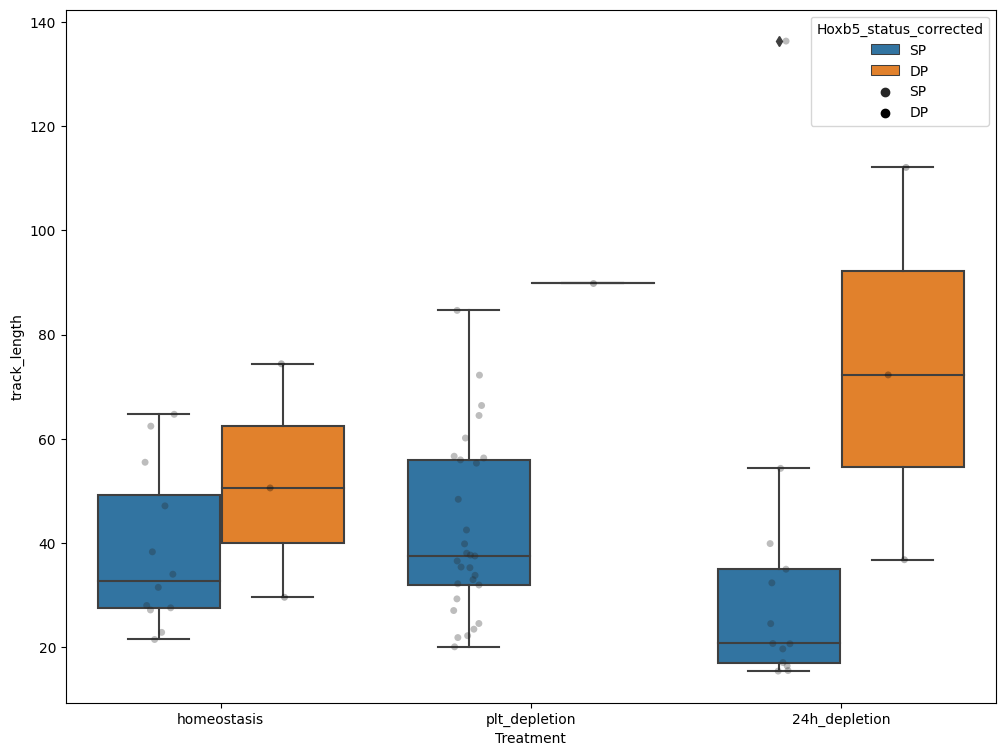

In [190]:
#PLOTTING RESULTS of track length
# 
import statistics
import seaborn as sns

#Either:
# datax=data
#Or
data= pd.read_csv("/Users/secchim/Downloads/CellProfiler/movie_processing/trackincorrect.csv", header = 0)
data.dropna()
count_DP=0

#DP/SP Hoxb5_status
Hoxb5_cells=[]
Hoxb5Vwf_cells=[]

# print(len(data))
#CONSIDERS CELLS TO BE DP IF LABELLED AS DP IN 3 FRAMES MINIMUM
#SHOULD PROBABLY BE DONE ON THE FINAL CELL_ID RATHER THAN TRACK ID
grouped=data.groupby(['Final_Cell_ID'])
# print(grouped)
for i, newdf in grouped:
    newdf=newdf[newdf['Hoxb5_status'] == 'DP']
    # newdf=newdf[newdf['MK_distance']>2] #ADD THIS NEW LINE!!!!!!
    count_DP=newdf.shape[0]
    # print(count_DP)
    # if count_DP > (len(newdf.index))/2:
    if count_DP > 3:
        Hoxb5Vwf_cells.append(i) #137
# # print(Hoxb5Vwf_cells)
    # dflist.append(newdf)
# datax=pd.concat(dflist)

Hoxb5Vwf_list=np.unique(Hoxb5Vwf_cells)
print(Hoxb5Vwf_list)


datax=data
datax['Hoxb5_status_corrected']='SP'
for i in datax.index:
    if datax.loc[i,'Final_Cell_ID'] in Hoxb5Vwf_list:
        datax.loc[i,'Hoxb5_status_corrected']='DP'
        # print('DP', i)
    # else:
        # datax.loc[i,'Hoxb5_status_corrected']='SP'
        # print('SP', i)
# print(datax)
# print(len(datax))
# dx=datax.drop_duplicates()
# print(len(dx))
# print(dx['Relative_treatment_Time']=='na')



#IS THIS THE RIGHT PLACE FOR IT?
# #CONSIDERS CELLS TO BE DP IF LABELLED AS DP IN 3 FRAMES MINIMUM
# #SHOULD PROBABLY BE DONE ON THE FINAL CELL_ID RATHER THAN TRACK ID
# grouped=data.groupby(['Final_Cell_ID'])
# # print(grouped)
# for i, newdf in grouped:
#     newdf=newdf[newdf['Hoxb5_status'] == 'DP']
#     # newdf=newdf[newdf['MK_distance']>2] #ADD THIS NEW LINE!!!!!!
#     count_DP=newdf.shape[0]
#     # print(count_DP)
#     # if count_DP > (len(newdf.index))/2:
#     if count_DP > 3:
#         Hoxb5Vwf_cells.append(i) #137
# # # print(Hoxb5Vwf_cells)

# Hoxb5Vwf_list=np.unique(Hoxb5Vwf_cells)
# # print(Hoxb5Vwf_list)

# grouped=data.groupby(['Final_Cell_ID'])
# for i, newdf in grouped:
#     if i in Hoxb5Vwf_list:
#         newdf['Hoxb5_status_corrected']='DP'
#     else:
#         newdf['Hoxb5_status_corrected']='SP'
#     dflist.append(newdf)
# data=pd.concat(dflist)


# https://datavizpyr.com/boxplots-with-points-using-seaborn-in-python/
#https://seaborn.pydata.org/generated/seaborn.stripplot.html
datab=datax[['Final_Cell_ID', 'Treatment', 'Hoxb5_status_corrected', 'track_length']]#or datax

df_list =[]
grouped=datab.groupby(['Final_Cell_ID'])
for i, newdf in grouped:
    if len(newdf.index) >=11:
        df_list.append(newdf)
        print(i)
datab=pd.concat(df_list)
# print(len(datab))


dx=datab.drop_duplicates()
dx=dx[dx['track_length']!=0]

# print(dx)
sns.boxplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="track_length", data=dx,  order =['homeostasis','plt_depletion','24h_depletion'])
sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="track_length", data=dx, dodge=True, color='black', alpha=0.3,  order =['homeostasis','plt_depletion','24h_depletion'])


VWF_043_MS211118_m1-p5_11_12_homeostasismovie_vasculature_P12_1.5259021893143654e-05
VWF_043_MS211118_m1-p5_11_12_homeostasismovie_vasculature_P5_1.5259021893143654e-05
VWF_043_MS211118_m1-p5_11_12_pltdepletionmovie_P5_1.5259021893143654e-05
VWF_043_MS211118_m1-p5_11_12_pltdepletionmovie_P5_3.051804378628731e-05
VWF_043_MS211125_m3-homeostasis_movie5_1.5x_P18+_1.5259021893143654e-05
VWF_043_MS211125_m3-homeostasis_movie5_1.5x_P23+_3.051804378628731e-05
VWF_043_MS211125_m3-homeostasis_movie5_1.5x_P32+_1.5259021893143654e-05
VWF_043_MS211126_m4-homeostasismovie_2_P12+_1.5259021893143654e-05
VWF_043_MS211126_m4-homeostasismovie_2_P7++_1.5259021893143654e-05
VWF_043_MS211126_m4-homeostasismovie_2_P7++_4.577706567943096e-05
VWF_043_MS211126_m4-pltdepletionmovie2_P7++_1.5259021893143654e-05
VWF_043_MS211126_m4-pltdepletionmovie3_P17+_1.5259021893143654e-05
VWF_043_MS211126_m4-pltdepletionmovie3_P17+_3.051804378628731e-05
VWF_043_MS211126_m4-pltdepletionmovie3_P7++_1.5259021893143654e-05
VWF_

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_58829/1780164711.py:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/opt/anaconda3/envs/3Dtrackplot/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Treatment', ylabel='max_displacement'>

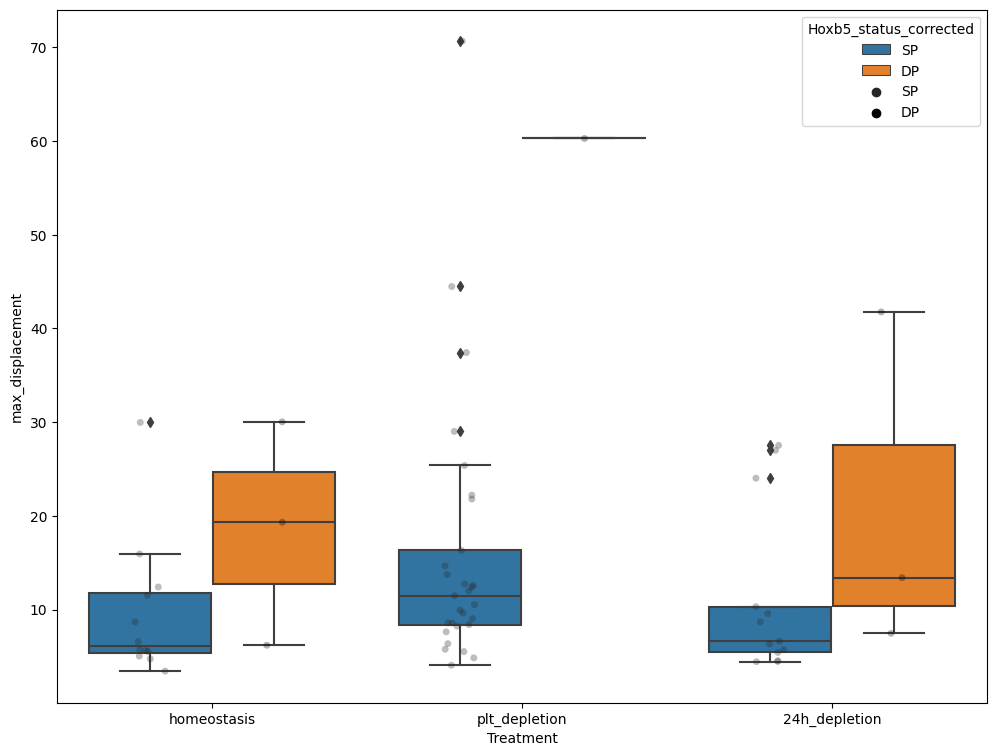

In [146]:
#PRINT MAXIMUM DISPLACEMENT

datab=datax[['Final_Cell_ID', 'Treatment', 'Hoxb5_status_corrected', 'max_displacement']]
# print(len(datab))

df_list =[]
grouped=datab.groupby(['Final_Cell_ID'])
for i, newdf in grouped:
    if len(newdf.index) >=11:
        print(i)
        df_list.append(newdf)
datab=pd.concat(df_list)
# print(len(datab))
# datay=datax.groupby("Final_Cell_ID").agg([np.mean,np.std])
# print(datay)
# print(datab)

# dx=datax.groupby(['Final_Cell_ID'])
# print(dx)
# for grouping_item, grouped_df in dx:
    # sns.boxplot(x=("Treatment"), hue='Hoxb5_status', y="track_length", data=grouped_df)
    # sns.stripplot(x=("Treatment"),hue='Hoxb5_status', y="track_length", data=grouped_df, dodge=True, color='black', alpha=0.3)

dx=datab.drop_duplicates()
dx=dx[dx['max_displacement']!=0]
# print(dx)
sns.boxplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="max_displacement", data=dx,  order =['homeostasis','plt_depletion','24h_depletion'])
sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="max_displacement", data=dx, dodge=True, color='black', alpha=0.3,  order =['homeostasis','plt_depletion','24h_depletion'])


/opt/anaconda3/envs/3Dtrackplot/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Treatment', ylabel='distance'>

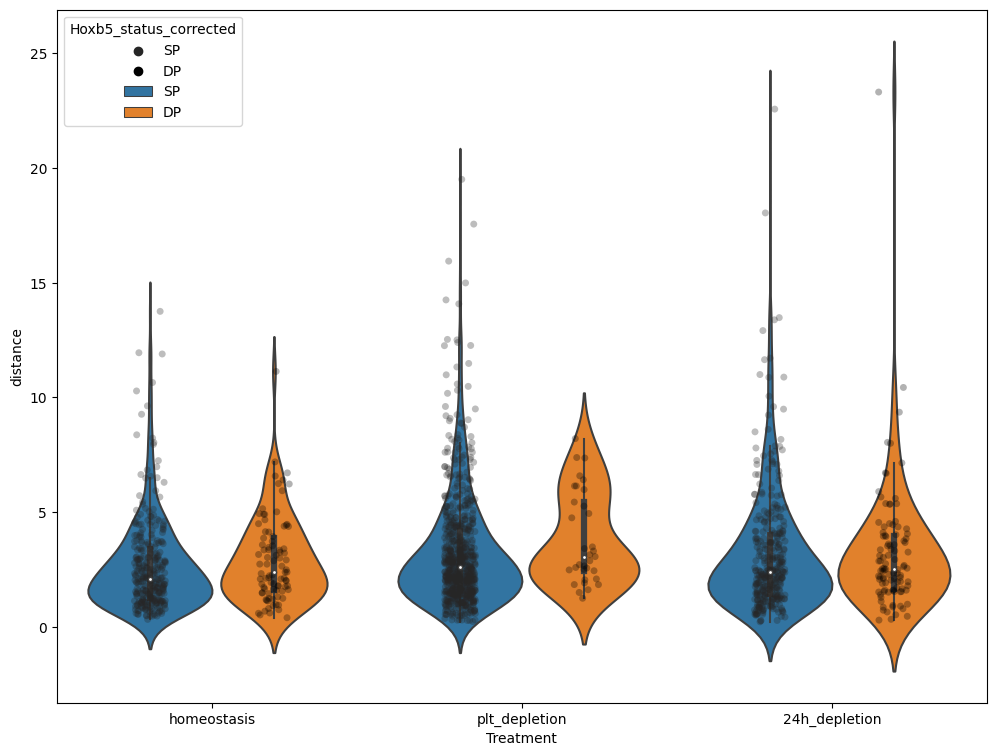

In [164]:
#QC plot
# 
dx=datax[datax['max_displacement']!=0]
# sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="distance", data=dx, dodge=True, order =['homeostasis','plt_depletion','24h_depletion'])
# dx.to_csv('/Users/secchim/Downloads/CellProfiler/movie_pipeline_test/qc.csv')
# sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="frame_speed", data=dx, dodge=True, order =['homeostasis','plt_depletion','24h_depletion'])

dx.dropna()

##DISTANCE VIOLIN PLOT
sns.stripplot( x=("Treatment"),hue='Hoxb5_status_corrected', y="distance", data=dx, dodge=True, color='black', alpha=0.3, order =['homeostasis','plt_depletion','24h_depletion'])
sns.violinplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="distance", data=dx, order =['homeostasis','plt_depletion','24h_depletion'])

/opt/anaconda3/envs/3Dtrackplot/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Treatment', ylabel='frame_speed'>

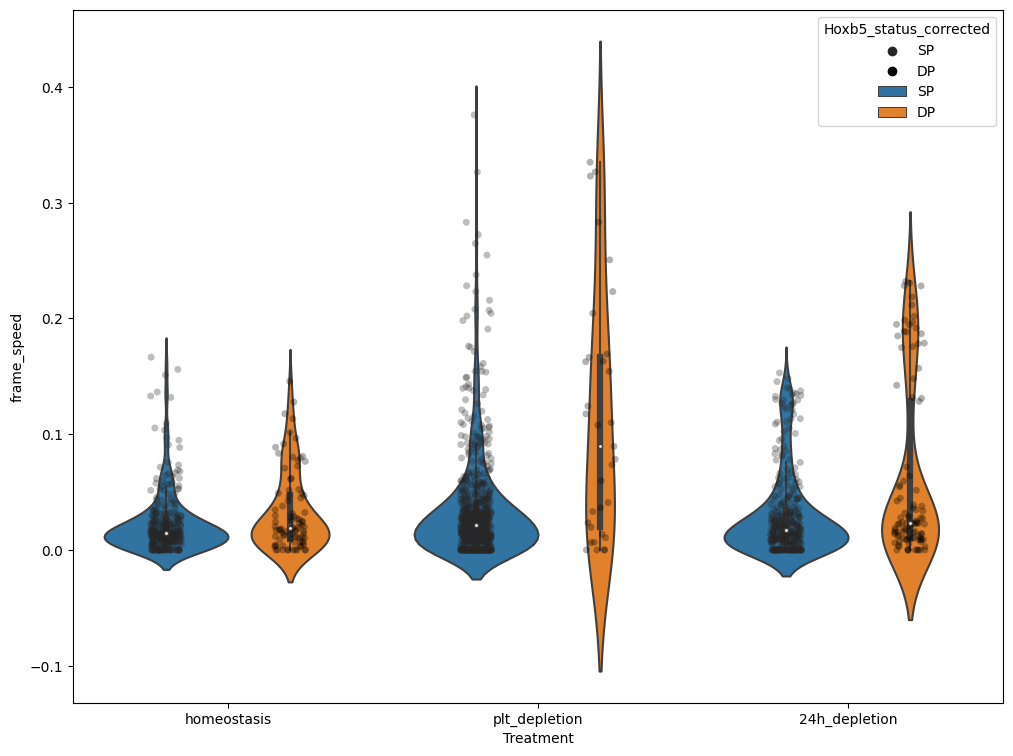

In [162]:
###FRAME SPEED VIOLIN PLOT
dx.dropna()
sns.stripplot( x=("Treatment"),hue='Hoxb5_status_corrected', y="frame_speed", data=dx, dodge=True, color='black', alpha=0.3, order =['homeostasis','plt_depletion','24h_depletion'])
sns.violinplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="frame_speed", data=dx, order =['homeostasis','plt_depletion','24h_depletion'])

/opt/anaconda3/envs/3Dtrackplot/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Treatment', ylabel='linearity_coefficient'>

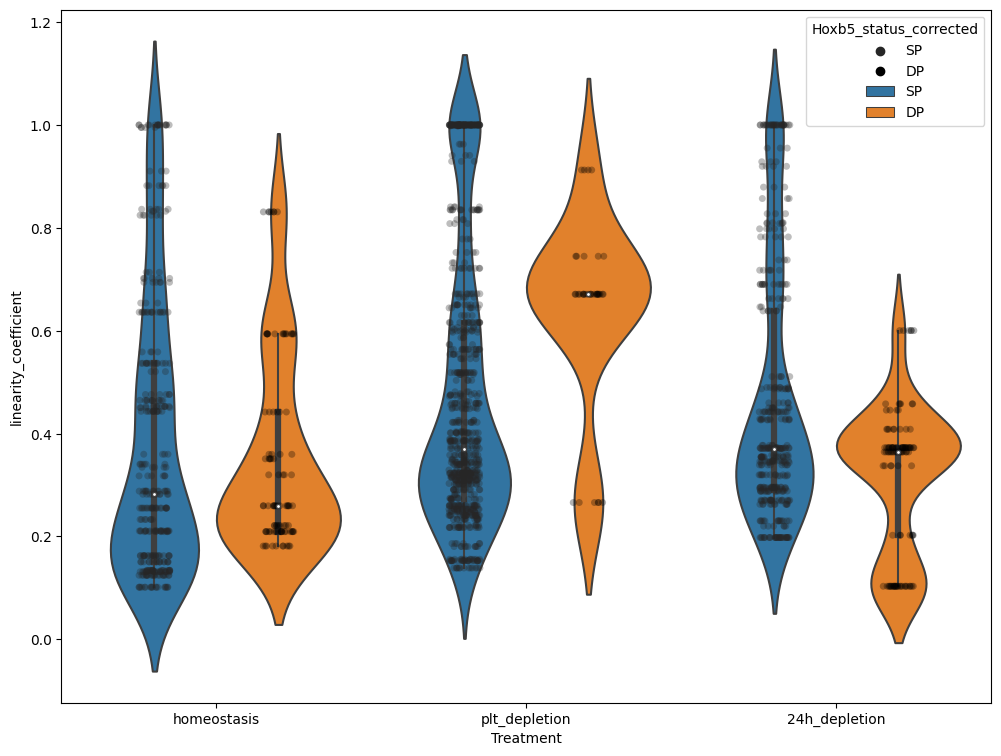

In [196]:
##LINEARITY COEFFICIENT VIOLIN PLOT
dx=data[['Final_Cell_ID', 'Treatment', 'Hoxb5_status_corrected', 'linearity_coefficient']]
dx.dropna()
dx.drop_duplicates()
# sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="linearity_coefficient", data=dx, dodge=True, order =['homeostasis','plt_depletion','24h_depletion'])
sns.stripplot( x=("Treatment"),hue='Hoxb5_status_corrected', y="linearity_coefficient", data=dx, dodge=True, color='black', alpha=0.3, order =['homeostasis','plt_depletion','24h_depletion'])
sns.violinplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="linearity_coefficient", data=dx, order =['homeostasis','plt_depletion','24h_depletion'])

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_58829/2260718038.py:10: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


VWF_043_MS211118_m1-p5_11_12_homeostasismovie_vasculature_P12_1.5259021893143654e-05
VWF_043_MS211118_m1-p5_11_12_homeostasismovie_vasculature_P5_1.5259021893143654e-05
VWF_043_MS211118_m1-p5_11_12_pltdepletionmovie_P5_1.5259021893143654e-05
VWF_043_MS211118_m1-p5_11_12_pltdepletionmovie_P5_3.051804378628731e-05
VWF_043_MS211125_m3-homeostasis_movie5_1.5x_P18+_1.5259021893143654e-05
VWF_043_MS211125_m3-homeostasis_movie5_1.5x_P23+_3.051804378628731e-05
VWF_043_MS211125_m3-homeostasis_movie5_1.5x_P32+_1.5259021893143654e-05
VWF_043_MS211126_m4-homeostasismovie_2_P12+_1.5259021893143654e-05
VWF_043_MS211126_m4-homeostasismovie_2_P7++_1.5259021893143654e-05
VWF_043_MS211126_m4-homeostasismovie_2_P7++_4.577706567943096e-05
VWF_043_MS211126_m4-pltdepletionmovie2_P7++_1.5259021893143654e-05
VWF_043_MS211126_m4-pltdepletionmovie3_P17+_1.5259021893143654e-05
VWF_043_MS211126_m4-pltdepletionmovie3_P17+_3.051804378628731e-05
VWF_043_MS211126_m4-pltdepletionmovie3_P7++_1.5259021893143654e-05
VWF_

[(0.0, 0.4)]

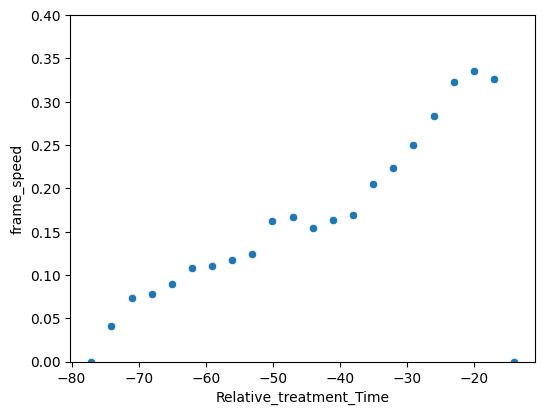

In [75]:
import statistics
import seaborn as sns
# sns.reset_defaults()




df_list =[]
grouped=datax.groupby(['Final_Cell_ID'])
for i, newdf in grouped:
    if len(newdf.index) >=11:
        print(i)
        df_list.append(newdf)
datab=pd.concat(df_list)


# # datab=datab.dropna(axis=0, subset=['Relative_treatment_Time'])
# datax['Relative_treatment_Time'] = datax['Relative_treatment_Time'].astype(float)
# sns.scatterplot(x="Relative_treatment_Time", y="frame_speed",hue='Hoxb5_status_corrected', data=datab)


#stripplot not suitable, x axis looks terrible
#sns.stripplot(x=("Relative_treatment_Time"),hue='Hoxb5_status_corrected', y="frame_speed", data=datax, dodge=True, legend='brief')
#scatter plot doesn't allow dodge
# plt.scatter(x=("Relative_treatment_Time"), y="frame_speed", data=datax[datax['Hoxb5_status_corrected']=='SP'], color='orange', alpha=0.3)
# plt.scatter(x=("Relative_treatment_Time"), y="frame_speed", data=datax[datax['Hoxb5_status_corrected']=='DP'], color='green', alpha=0.3)

# sns.scatterplot(x="Relative_treatment_Time", y="distance", hue='Hoxb5_status_corrected', palette='pastel', data=datax)

# datax.to_csv('/Users/secchim/Downloads/CellProfiler/movie_pipeline_test/wrong.csv')

##SEPARATING HOXB5+vwf- AND HOXB5-vwf+ CELLS
dx=datab[datab['Hoxb5_status_corrected']=='DP']
dx=dx[dx['Treatment']=='plt_depletion']

##PLOTTING TREATED MICE
# figure size in inches #THE SMALLER THE FIGURES ARE THE BIGGER THE TEXT
fig, ax = plt.subplots(figsize=(6,4.5))
dx=dx[dx['Relative_treatment_Time']!=0]
g=sns.scatterplot(x="Relative_treatment_Time", y="frame_speed", data=dx)
g.set(ylim=(0, 0.4))



[(0.0, 0.4)]

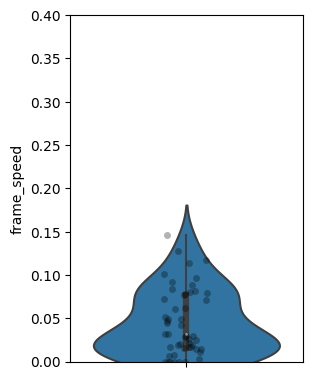

In [76]:
##PLOTTING HOMEOSTASIS OF TREATED MICE
# dx=dx[dx['Relative_treatment_Time']<0]
# g=sns.scatterplot(x="Relative_treatment_Time", y="frame_speed", data=dx)
# g.set(ylim=(0, 0.21))

dx=datab[datab['Hoxb5_status_corrected']=='DP']
dx=dx[dx['Treatment']=='homeostasis']

# #PLOTTING HOMEOSTASIS OF UNTREATED MICE
fig, ax = plt.subplots(figsize=(3,4.5))
dx=dx[dx['Relative_treatment_Time']==0]
g=sns.violinplot(y="frame_speed", data=dx)
gg=sns.stripplot( y="frame_speed", data=dx, dodge=True, color='black', alpha=0.3)
# g.set(xlim=(-1, 1))
g.set(ylim=(0, 0.4))
# gg.set(xlim=(-1, 1))
gg.set(ylim=(0, 0.4))

##PLOTING DEPLETION ONLY
# dx=dx[dx['Treatment_corrected']=='Depletion']
# g=sns.scatterplot(x="Relative_treatment_Time", y="frame_speed", data=dx)
# g.set(ylim=(0, 0.21))


# sns.scatterplot(x="Track_ID", y="frame_speed",hue='track_length', data=dx)
# sns.scatterplot(x="Relative_treatment_Time", y="frame_speed",hue='track_length', data=dx)


# sns.scatterplot(x="Relative_treatment_Time", y="frame_speed",hue='track_length', data=datab[datab['Hoxb5_status_corrected']=='DP'])

In [174]:
print(data)
# data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_pipeline_test/wrong.csv')

     ImageNumber  ObjectNumber  Metadata_Channelnb  Metadata_FileLocation  \
0              1             1                 NaN                    NaN   
1              2             1                 NaN                    NaN   
2              3             1                 NaN                    NaN   
3              4             1                 NaN                    NaN   
4              5             1                 NaN                    NaN   
..           ...           ...                 ...                    ...   
826          559             1                 NaN                    NaN   
827          560             1                 NaN                    NaN   
828          561             1                 NaN                    NaN   
829          562             1                 NaN                    NaN   
831          564             1                 NaN                    NaN   

     Metadata_Format1  Metadata_Format2  Metadata_Frame  Metadata_Series  \

In [1]:
# pip install git+git://github.com/cytomining/pycytominer@2aa8638d7e505ab510f1d5282098dd59bb2cb470

# import scipy
# from scipy import stats
import pycytominer
# pip install scipy=1.4.1 #had 1.9.1

In [61]:
#Feature selection using pycytominer
#back up #importing the metadata
metadata=pd.read_csv('/Users/secchim/Documents/221103merged_metadata_and_mice.csv')
metadata['Metadata_VWF']=(metadata['Position_Name']).str.replace('.czi_','_')
Pdata = pd.read_csv('/Users/secchim/Downloads/CellProfiler/movie_pipeline_test/KuOTrackingRemovedObjectsSPDP.csv', header = 0)
# print(Pdata)

#REMOVE THE METADATA COLUMNS AND COLUMNS THAT HAVE STRINGS IN THEIR VALUES
df_temp=Pdata.iloc[:,23:-1]
col_list=df_temp.columns.values.tolist()
# print(col_list)
# print(df_temp)
#problem Hoxb5_status not in metadata
# df_temp['Metadata_Hoxb5_status']=df_temp['Hoxb5_status']
#will need to remove the Hoxb5_status column 
# print(df_temp)

# df_norm = pycytominer.normalize(df_temp, method = 'mad_robustize', mad_robustize_epsilon = 0, samples = "Metadata_Compound == 'DMSO'") 
df_selected = pycytominer.feature_select(df_temp, operation = ['correlation_threshold', 'variance_threshold', 'drop_na_columns', 'blocklist','drop_outliers'], outlier_cutoff = 500, features=col_list)
print('How many columns were dropped?',df_temp.shape[1] - df_selected.shape[1])

# df_temp=pycytominer.annotate(Pdata, metadata, join_on=['Metadata_VWF','Metadata_VWF'])

How many columns were dropped? 65


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_10739/3050780689.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  metadata['Metadata_VWF']=(metadata['Position_Name']).str.replace('.czi_','_')


In [ ]:
# #calculate distance between timeframes

# data['distance']=0
# grouped=data.groupby(['Final_Cell_ID'])
# dflist=[]
# for i, newdf in grouped:
#     for b, r in newdf.iterrows(): 
#         # print(b)
#         try:
#             newdf.loc[b, "distance"]=(math.sqrt((newdf["corrected_x_2"][b]-newdf["corrected_x_2"][b+1])**2+(newdf["corrected_y_2"][b]-newdf["corrected_y_2"][b+1])**2+(newdf["corrected_z_2"][b]-newdf["corrected_z_2"][b+1])**2))
        
#             # newdf["distance"]=(math.sqrt((newdf["corrected_x_2"][r]-newdf["corrected_x_2"][r+1])**2+(newdf["corrected_y_2"][r]-newdf["corrected_y_2"][r+1])**2+(newdf["corrected_z_2"][r]-newdf["corrected_z_2"][r+1])**2))
#         except:
#             # print(i, r, "error")
#             pass
#     # print(newdf["distance"])
#     dflist.append(newdf)
# dataX=pd.concat(dflist)
# print(dataX['distance'])

# data["distance"] = math.dist((
#         np.absolute(data["corrected_x_2"]).values,
#         np.absolute(data["corrected_y_2"]).values,
#         np.absolute(data["corrected_z_2"]).values
#         ),(
#         np.absolute(data["corrected_x_2"].shift(1)).values,
#         np.absolute(data["corrected_y_2"].shift(1)).values,
#         np.absolute(data["corrected_z_2"].shift(1)).values
#         ))
# print(data["distance"])

# # print(np.absolute(data["corrected_x_2"]).values)
# # #CONNECT TRACKS BACK UP VERSION

# data['Cell_group']=data['FileID']+'_'+data['Cell_name']
# data['Final_Cell_ID']=data['Metadata_VWF']

# grouped=data.groupby(['Cell_group'])
# stored_X=0
# stored_Y=0
# list_of_index=[]
# dflist=[]
# for i, newdf in grouped:
#     # print(i)
#     # newdf=newdf.sort_values(by=[‘AcquisitionTime’, ‘Metadata_Timepoint’])
#     min, max = newdf.groupby('AcquisitionTime')['Metadata_Timepoint'].idxmin(), newdf.groupby('AcquisitionTime')['Metadata_Timepoint'].idxmax()
#     t = []
#     for mi, ma in zip(min, max):
#         t += [mi, ma]
#     t
#     for i in range(1, len(t)-1, 2):
#         # print(t[i], t[i+1])
#         stored_X=data['corrected_x'][t[i]]
#         stored_X1=data['corrected_x'][t[i+1]]
#         stored_Y=data['corrected_x'][t[i]]
#         stored_Y1=data['corrected_x'][t[i+1]]
#         # print(t[i], stored_X, t[i+1], stored_X1)
#         if (abs(stored_X1-stored_X))<=20 and (abs(stored_Y1-stored_Y))<=20:
#             newdf['Final_Cell_ID']=newdf['Cell_group']+'_'+(str(stored_X))[:5]
#             # print(newdf[‘Final_Cell_ID’])
#     dflist.append(newdf)
# data=pd.concat(dflist)
# print(data['Final_Cell_ID'])


# #NORMALIZING POSITIONS TO THE FIRST COORDINATES
# #do on the unique Cell_ID rather than Track_ID
# #PROBLEM OF I DONT HAVE THE Z FOR THE STAGE POSITION
# data['corrected_x_2']=data['Location_Center_X']
# data['corrected_y_2']=data['Location_Center_Y']
# data['corrected_z_2']=data['Location_Center_Z']
# data['norm_x']=0
# grouped=data.groupby(['Track_ID'])

# dflist=[]
# print(grouped)
# for i, newdf in grouped:
#     newdf2=newdf[newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()]#or '0'?
#     norm_x=newdf2['Location_Center_X'].values
#     norm_y=newdf2['Location_Center_Y'].values
#     norm_z=newdf2['Location_Center_Z'].values

#     newdf['norm_x']=[norm_x[0]]*len(newdf)#you could create pd.Series
#     # print(newdf['norm_x'])
#     newdf['corrected_x_2']=((newdf['Location_Center_X']-newdf['norm_x'])*(newdf['Scale_X'])*1000000)
#     # print(newdf['corrected_x_2'])
#     newdf['norm_y']=[norm_y[0]]*len(newdf)#you could create pd.Series
#     newdf['corrected_y_2']=((newdf['Location_Center_Y']-newdf['norm_y'])*(newdf['Scale_Y'])*1000000)
#     newdf['norm_z']=[norm_z[0]]*len(newdf)#you could create pd.Series
#     newdf['corrected_z_2']=((newdf['Location_Center_Z']-newdf['norm_z'])*(newdf['Scale_Z'])*1000000)
#     dflist.append(newdf)
# data=pd.concat(dflist)
# print(data)

# grouped=data.groupby(['Track_ID'])

# for i, newdf in grouped:
#     newdf2=newdf[newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()]#or '0'?
#     norm_x=newdf2['Location_Center_X'].values
#     newdf['corrected_x_2']=((newdf['Location_Center_X']-newdf['norm_x'])*(newdf['Scale_X'])*1000000)
#     newdf2=newdf[newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()]
#     val=newdf2['corrected_x_2'].values
#     print(i, val)

In [9]:
count_DP=0

#DP/SP Hoxb5_status
Hoxb5_cells=[]
Hoxb5Vwf_cells=[]


#CONSIDERS CELLS TO BE DP IF LABELLED AS DP IN 3 FRAMES MINIMUM
#SHOULD PROBABLY BE DONE ON THE FINAL CELL_ID RATHER THAN TRACK ID
grouped=data.groupby(['Final_Cell_ID'])
# print(grouped)
for i, newdf in grouped:
    newdf=newdf[newdf['Hoxb5_status'] == 'DP']
    # newdf=newdf[newdf['MK_distance']>2] #ADD THIS NEW LINE!!!!!!
    count_DP=newdf.shape[0]
    # print(count_DP)
    # if count_DP > (len(newdf.index))/2:
    if count_DP > 3:
        Hoxb5Vwf_cells.append(i) #137
# # print(Hoxb5Vwf_cells)

Hoxb5Vwf_list=np.unique(Hoxb5Vwf_cells)
print(Hoxb5Vwf_list)
dflist=[]
grouped=data.groupby(['Final_Cell_ID'])
for i, newdf in grouped:
    if i in Hoxb5Vwf_list:
        newdf['Hoxb5_status_corrected']='DP'
    else:
        newdf['Hoxb5_status_corrected']='SP'
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['Hoxb5_status_corrected'],data['Hoxb5_status'])
# data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_pipeline_test/data_wrongtrack.csv')


['VWF_043_MS211126_m4-homeostasismovie_2_P7++_3.051804378628731e-05'
 'VWF_043_MS211126_m4-homeostasismovie_2_P7++_4.577706567943096e-05'
 'VWF_048_MS220118_M3_movie2homeostasis_P6DP+_1.5259021893143654e-05'
 'VWF_048_MS220118_M3_movie4plt_P12+_6.103608757257462e-05'
 'VWF_048_MS220118_M3_movie4plt_P22+_6.103608757257462e-05'
 'VWF_048_MS220118_M3_movie4plt_P6DP+_4.577706567943096e-05'
 'VWF_048_MS220118_M3_movie4plt_P6DP+_7.629510946571827e-05'
 'VWF_049_MS220201_M1_Snap_movie5depletion_P12DP_1.5259021893143654e-05'
 'VWF_062_MS220421_M2_movie_P4_1.5259021893143654e-05'
 'VWF_062_MS220421_M2_movie_P6_1.5259021893143654e-05']
0      SP
1      SP
2      SP
3      SP
4      SP
       ..
613    SP
614    SP
615    SP
616    SP
617    SP
Name: Hoxb5_status_corrected, Length: 618, dtype: object 0      SP
1      SP
2      SP
3      SP
4      SP
       ..
613    SP
614    SP
615    SP
616    SP
617    SP
Name: Hoxb5_status, Length: 618, dtype: object


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_17116/1789773475.py:12: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_17116/1789773475.py:26: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


In [ ]:
# %history
#saved my life when I deleted a bunch of code

555
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New si

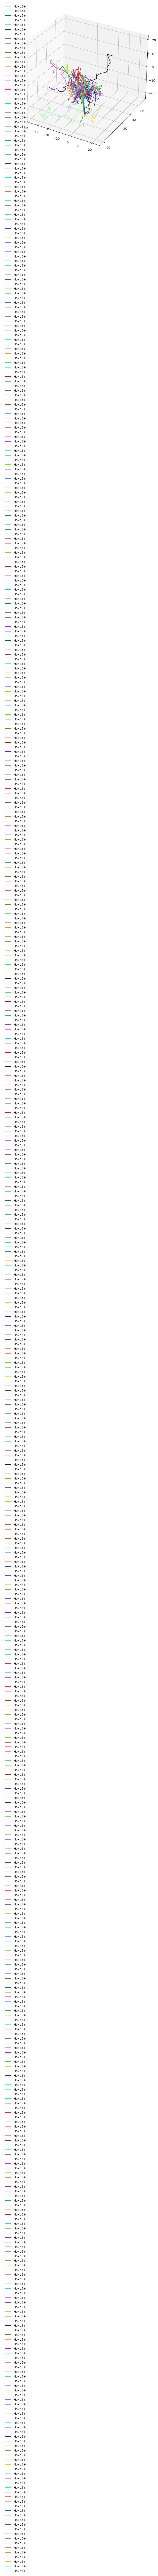

In [89]:
### homeostasis plot, NOT separating Hoxb5+ and Hoxb5+Vwf+

#removing TRACKS THAT ARE TOO SHORT
#print(my_list_hoxb5vwf)
remove_list =[]
# grouped=data.groupby(['Track_ID'])
# print(grouped)
# for i, newdf in grouped:
#     if len(newdf.index) <=18:
#         print(i,'PBM')
#         remove_list.append(i) #137
#     else:
#         print(i, 'no problem')


# print(len(remove_list), remove_list)

# print(len(data))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

my_list_hoxb5 = np.unique(data['Track_ID'])
print(len(my_list_hoxb5))

#Plotting the tracks 

for a in my_list_hoxb5:
    data1= data[(data['Track_ID'] == a)].sort_values(by=['Metadata_Timepoint'])#Make sure not a string 
#    if len(data1['Metadata_Timepoint'])>2
    if a not in remove_list :
        X1= data1['corrected_x_2']
        Y1= data1['corrected_y_2']
        Z1= data1['corrected_z_2']
        r= random.random()
        b= random.random()
        g= random.random()
        ax.plot(X1, Y1, Z1, label='Hoxb5+', c=(r,g,b))
        
    #    ax.set_xlim(-15, 20)
    #    ax.set_ylim(-20, 30)
    #    ax.set_zlim(-20, 10)    
        # ax.set_xlim(-65, 85)
        # ax.set_ylim(-125, 25)
        # ax.set_zlim(-4, 4)
        ax.legend(loc='upper left')

        # Set figure width to 12 and height to 9
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0] = 12
        fig_size[1] = 9
        plt.rcParams["figure.figsize"] = fig_size
        print ("New size:", fig_size)


In [ ]:
#grouped=merged_df.groupby(['Metadata_VWF'])
# for i in grouped:
#     my_list_hoxb5 = np.unique(data['Intensity_MaxIntensity_track'])
# print(data['AcquisitionTime'], data['Time of treatment'])
# print(newdf[newdf['Treatment']=='plt_depletion']['Time of treatment'].values[0])

# #REMOVING DUPLICATES from the merge 
# grouped=data.groupby(['Position_Name'])
# grouped #list of dataframes

# dflist=[]

# for i, newdf in grouped: #new df is grouped data franes
#    # print(i,df)
#     if newdf.shape[0]>1:
#         print(newdf.shape)

#         #if row has plt_depletion take time of treatment add acquisition time add to all rows in the group 
#         trmttime=newdf[newdf['Treatment']=='plt_depletion']['Time of treatment'].values[0]#numpy array, get the first value
#         #if trmttime > newdf['AcquisitionTime']:
#         newdf['TrueTreatment']=np.where(newdf['AcquisitionTime']<trmttime, 'Thomeostasis', 'Tdepletion')
#     else: 
#         newdf['TrueTreatment']="none"
#     dflist.append(newdf)
# xdf=pd.concat(dflist)

# xdf[~((xdf['Treatment'].str.contains("plt_depletion")) & (xdf['TrueTreatment'].str.contains("Thomeostasis")))]
# xdf[~((xdf['Treatment'].str.contains("homeostasis")) & (xdf['TrueTreatment'].str.contains("Tdepletion")))]

# print('data drop duplicates', len(xdf))
# data=xdf

In [151]:
#copied to make it easier
data= pd.read_csv("/Users/secchim/Downloads/CellProfiler/movie_processing/trackincorrect.csv", header = 0)

count_DP=0

#DP/SP Hoxb5_status
Hoxb5_cells=[]
Hoxb5Vwf_cells=[]

# print(len(data))
#CONSIDERS CELLS TO BE DP IF LABELLED AS DP IN 3 FRAMES MINIMUM
#SHOULD PROBABLY BE DONE ON THE FINAL CELL_ID RATHER THAN TRACK ID
grouped=data.groupby(['Final_Cell_ID'])
# print(grouped)
for i, newdf in grouped:
    newdf=newdf[newdf['Hoxb5_status'] == 'DP']
    # newdf=newdf[newdf['MK_distance']>2] #ADD THIS NEW LINE!!!!!!
    count_DP=newdf.shape[0]
    # print(count_DP)
    # if count_DP > (len(newdf.index))/2:
    if count_DP > 3:
        Hoxb5Vwf_cells.append(i) #137
# # print(Hoxb5Vwf_cells)
    # dflist.append(newdf)
# datax=pd.concat(dflist)

Hoxb5Vwf_list=np.unique(Hoxb5Vwf_cells)
print(Hoxb5Vwf_list)


datax=data
datax['Hoxb5_status_corrected']='SP'
for i in datax.index:
    if datax.loc[i,'Final_Cell_ID'] in Hoxb5Vwf_list:
        datax.loc[i,'Hoxb5_status_corrected']='DP'

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_58829/4190504475.py:2: DtypeWarning: Columns (414,418,423,424,425,426,428,429) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv("/Users/secchim/Downloads/CellProfiler/movie_processing/trackincorrect.csv", header = 0)
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_58829/4190504475.py:15: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


['VWF_043_MS211118_m1-p5_11_12_homeostasismovie_vasculature_P12_3.051804378628731e-05'
 'VWF_043_MS211125_m3-homeostasis_movie5_1.5x_P32+_1.5259021893143654e-05'
 'VWF_043_MS211126_m4-homeostasismovie_2_P7++_1.5259021893143654e-05'
 'VWF_048_MS220119_M1_homeostasis_movie_3_P16DP_1.5259021893143654e-05'
 'VWF_049_MS220201_M1_Snap_movie4homeostasis_P10spot_4.577706567943096e-05'
 'VWF_049_MS220201_M1_Snap_movie4homeostasis_P12DP_6.103608757257462e-05'
 'VWF_049_MS220201_M1_Snap_movie4homeostasis_P12DP_7.629510946571827e-05'
 'VWF_053_MS220209_M1_movie8depletion_P26kuovascu_1.5259021893143654e-05'
 'VWF_060_MS220408_M1_MOVIE3_P11DP_1.5259021893143654e-05'
 'VWF_060_MS220408_M1_MOVIE3_P1DP_3.051804378628731e-05'
 'VWF_060_MS220408_M1_MOVIE5_P16_1.5259021893143654e-05'
 'VWF_060_MS220408_M1_MOVIE5_P4_2_4.577706567943096e-05'
 'VWF_062_MS220421_M5_MOVIE2_P16_2KUO_3.051804378628731e-05'
 'VWF_062_MS220421_M5_MOVIE2_P19_1.5259021893143654e-05'
 'VWF_062_MS220421_M5_MOVIE3_P16_2KUO_1.5259021893

['VWF_043_MS211118_m1-p5_11_12_homeostasismovie_vasculature_P12_3.051804378628731e-05'
 'VWF_043_MS211125_m3-homeostasis_movie5_1.5x_P32+_1.5259021893143654e-05'
 'VWF_043_MS211126_m4-homeostasismovie_2_P7++_1.5259021893143654e-05'
 'VWF_048_MS220119_M1_homeostasis_movie_3_P16DP_1.5259021893143654e-05'
 'VWF_049_MS220201_M1_Snap_movie4homeostasis_P10spot_4.577706567943096e-05'
 'VWF_049_MS220201_M1_Snap_movie4homeostasis_P12DP_6.103608757257462e-05'
 'VWF_049_MS220201_M1_Snap_movie4homeostasis_P12DP_7.629510946571827e-05'
 'VWF_053_MS220209_M1_movie8depletion_P26kuovascu_1.5259021893143654e-05'
 'VWF_060_MS220408_M1_MOVIE3_P11DP_1.5259021893143654e-05'
 'VWF_060_MS220408_M1_MOVIE3_P1DP_3.051804378628731e-05'
 'VWF_060_MS220408_M1_MOVIE5_P16_1.5259021893143654e-05'
 'VWF_060_MS220408_M1_MOVIE5_P4_2_4.577706567943096e-05'
 'VWF_062_MS220421_M5_MOVIE2_P16_2KUO_3.051804378628731e-05'
 'VWF_062_MS220421_M5_MOVIE2_P19_1.5259021893143654e-05'
 'VWF_062_MS220421_M5_MOVIE3_P16_2KUO_1.5259021893

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_58829/105573590.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


New size: [12, 9]
New size: [12, 9]


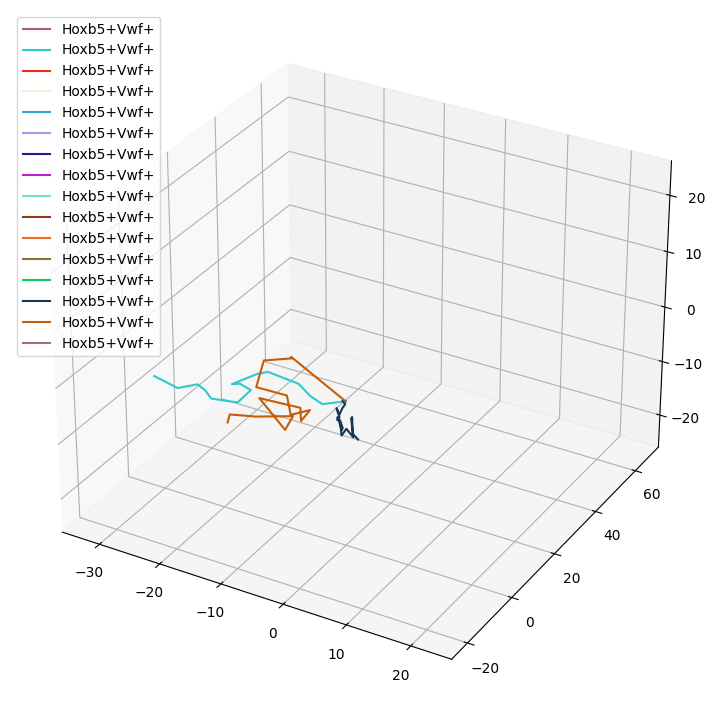

In [101]:
### homeostasis plot, separating Hoxb5+Vwf+

data=data[data['Treatment']=='homeostasis']
#removing TRACKS THAT ARE TOO SHORT
print(Hoxb5Vwf_list)
remove_list =[]
grouped=data.groupby(['Track_ID'])
print(grouped)
for i, newdf in grouped:
    if len(newdf.index) <=10:
        print(i,'PBM')
        remove_list.append(i) #137
    else:
        print(i, 'no problem')


# print(len(remove_list))

# remove_list.append(['VWF_043_MS211126_m4-homeostasismovie_2_P7++_3.05e-05', 'VWF_049_MS220201_M1_Snap_movie5depletion_P10spot_1.53e-05'])


print(len(data))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

#Plotting the tracks 

for a in Hoxb5Vwf_list:
    data1= data[(data['Track_ID'] == a)].sort_values(by=['Metadata_Timepoint'])#Make sure not a string 
#    if len(data1['Metadata_Timepoint'])>2
    if a not in remove_list:# and a not in my_list_hoxb5:
        X1= data1['corrected_x_2']
        Y1= data1['corrected_y_2']
        Z1= data1['corrected_z_2']
        r= random.random()
        b= random.random()
        g= random.random()
        ax.plot(X1, Y1, Z1, label='Hoxb5+Vwf+', c=(r,g,b))
        
    #    ax.set_xlim(-15, 20)
    #    ax.set_ylim(-20, 30)
    #    ax.set_zlim(-20, 10)    
        ax.set_xlim(-35, 25)
        ax.set_ylim(-25, 70)
        ax.set_zlim(-25, 25)
        ax.legend(loc='upper left')

        # Set figure width to 12 and height to 9
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0] = 12
        fig_size[1] = 9
        plt.rcParams["figure.figsize"] = fig_size
        print ("New size:", fig_size)


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_58829/1018709082.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


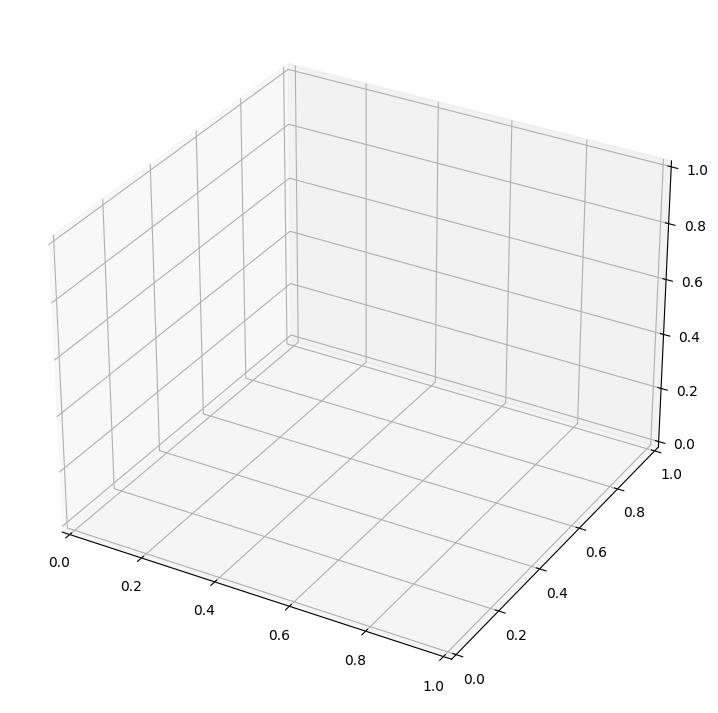

In [108]:
###post depletion plot Hoxb5+ Vwf+ 
data=data[data['Treatment']=='plt_depletion']
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

remove_list =[]
grouped=data.groupby(['Track_ID'])
print(grouped)
for i, newdf in grouped:
    if len(newdf.index) <=10:
        print(i,'PBM')
        remove_list.append(i) #137
    # elif newdf['Intensity_MaxIntensity_track'][i].astype(str).str.endswith('0.0'): #didn't work
    #     remove_list.append(i)
    else:
        print(i, 'no problem')

#    ax.set_xlim(-30, 30)
#    ax.set_ylim(-20, 50)
#    ax.set_zlim(-20, 30)
# my_list_dep_hoxb5vwf = ['VWF_043_MS211126_m4-homeostasismovie_2_P7++_3.05e-05', 'VWF_049_MS220201_M1_Snap_movie5depletion_P10spot_1.53e-05']

for a in Hoxb5Vwf_list:
    data1= data[(data['Track_ID'] == a)].sort_values(by=['Metadata_Timepoint'])#Make sure not a string 
    if a not in remove_list:
        X1= data1['corrected_x_2']
        Y1= data1['corrected_y_2']
        Z1= data1['corrected_z_2']
        r= random.random()
        b= random.random()
        g= random.random()
        ax.plot(X1, Y1, Z1, label='Hoxb5+Vwf+', c=(r,g,b))

        #    ax.set_xlim(-15, 20)
        #    ax.set_ylim(-20, 30)
        #    ax.set_zlim(-20, 10)    
        ax.set_xlim(-35, 25)
        ax.set_ylim(-25, 70)
        ax.set_zlim(-25, 25)
        ax.legend(loc='upper left')

        # Set figure width to 12 and height to 9
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0] = 12
        fig_size[1] = 9
        plt.rcParams["figure.figsize"] = fig_size
        print ("New size:", fig_size)



VWF_060_MS220408_M1_MOVIE1_P11DP_1.5259021893143654e-05 PBM
VWF_060_MS220408_M1_MOVIE1_P1DP_1.5259021893143654e-05 PBM
VWF_060_MS220408_M1_MOVIE1_P1DP_3.051804378628731e-05 PBM
VWF_060_MS220408_M1_MOVIE1_P8_1.5259021893143654e-05 PBM
VWF_060_MS220408_M1_MOVIE2_P4GREENVESSEL_1.5259021893143654e-05 PBM
VWF_060_MS220408_M1_MOVIE2_P4GREENVESSEL_3.051804378628731e-05 PBM
VWF_060_MS220408_M1_MOVIE3_P10_1.5259021893143654e-05 PBM
VWF_060_MS220408_M1_MOVIE3_P10_3.051804378628731e-05 PBM
VWF_060_MS220408_M1_MOVIE3_P10_4.577706567943096e-05 PBM
VWF_060_MS220408_M1_MOVIE3_P10_6.103608757257462e-05 PBM
VWF_060_MS220408_M1_MOVIE3_P11DP_1.5259021893143654e-05 PBM
VWF_060_MS220408_M1_MOVIE3_P1DP_1.5259021893143654e-05 PBM
VWF_060_MS220408_M1_MOVIE3_P1DP_3.051804378628731e-05 PBM
VWF_060_MS220408_M1_MOVIE3_P4GREENVESSEL_1.5259021893143654e-05 PBM
VWF_060_MS220408_M1_MOVIE3_P8_1.5259021893143654e-05 PBM
VWF_060_MS220408_M1_MOVIE4_P16_1.5259021893143654e-05 PBM
VWF_060_MS220408_M1_MOVIE4_P16_3.051804378

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_58829/4130047189.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


New size: [12, 9]
New size: [12, 9]


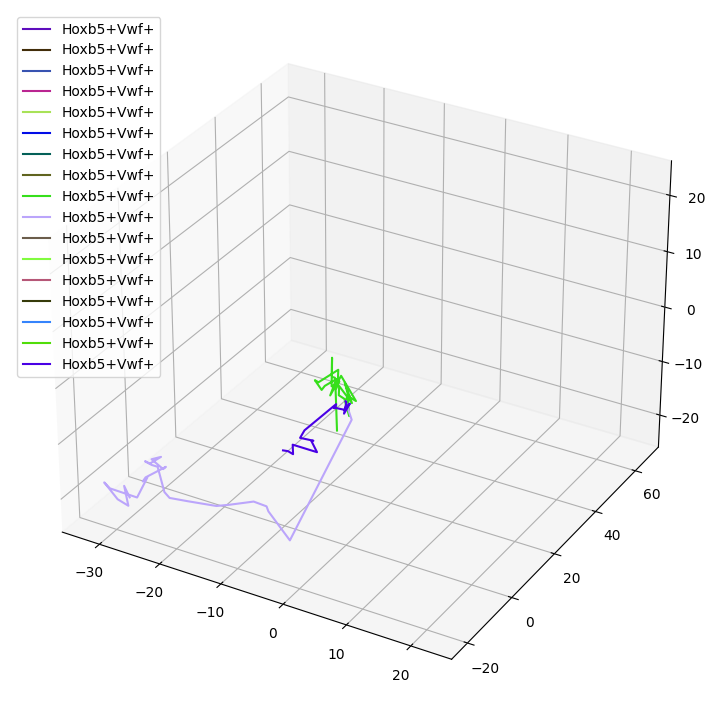

In [153]:
###24H post depletion plot Hoxb5+ Vwf+ 
data=data[data['Treatment']=='24h_depletion']
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

remove_list =[]
grouped=data.groupby(['Track_ID'])
print(grouped)
for i, newdf in grouped:
    if len(newdf.index) <=10:
        print(i,'PBM')
        remove_list.append(i) #137
    # elif newdf['Intensity_MaxIntensity_track'][i].astype(str).str.endswith('0.0'): #didn't work
    #     remove_list.append(i)
    else:
        print(i, 'no problem')

#    ax.set_xlim(-30, 30)
#    ax.set_ylim(-20, 50)
#    ax.set_zlim(-20, 30)
# my_list_dep_hoxb5vwf = ['VWF_043_MS211126_m4-homeostasismovie_2_P7++_3.05e-05', 'VWF_049_MS220201_M1_Snap_movie5depletion_P10spot_1.53e-05']

for a in Hoxb5Vwf_list:
    data1= data[(data['Track_ID'] == a)].sort_values(by=['Metadata_Timepoint'])#Make sure not a string 
    if a not in remove_list:
        X1= data1['corrected_x_2']
        Y1= data1['corrected_y_2']
        Z1= data1['corrected_z_2']
        r= random.random()
        b= random.random()
        g= random.random()
        ax.plot(X1, Y1, Z1, label='Hoxb5+Vwf+', c=(r,g,b))

        #    ax.set_xlim(-15, 20)
        #    ax.set_ylim(-20, 30)
        #    ax.set_zlim(-20, 10)    
        ax.set_xlim(-35, 25)
        ax.set_ylim(-25, 70)
        ax.set_zlim(-25, 25)
        ax.legend(loc='upper left')

        # Set figure width to 12 and height to 9
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0] = 12
        fig_size[1] = 9
        plt.rcParams["figure.figsize"] = fig_size
        print ("New size:", fig_size)



VWF_043_MS211125_m3-homeostasis_movie2_M1_1.5259021893143654e-05 PBM
VWF_043_MS211125_m3-homeostasis_movie2_M1_3.051804378628731e-05 PBM
VWF_043_MS211125_m3-homeostasis_movie2_M1_4.577706567943096e-05 PBM
VWF_043_MS211125_m3-homeostasis_movie2_M1_6.103608757257462e-05 PBM
VWF_043_MS211125_m3-homeostasis_movie2_M1_7.629510946571827e-05 PBM
VWF_043_MS211125_m3-homeostasis_movie2_P4_1.5259021893143654e-05 PBM
VWF_043_MS211125_m3-homeostasis_movie5_1.5x_P18+_1.5259021893143654e-05 no problem
VWF_043_MS211125_m3-homeostasis_movie5_1.5x_P18+_3.051804378628731e-05 PBM
VWF_043_MS211125_m3-homeostasis_movie5_1.5x_P23+_1.5259021893143654e-05 PBM
VWF_043_MS211125_m3-homeostasis_movie5_1.5x_P23+_3.051804378628731e-05 no problem
VWF_043_MS211125_m3-homeostasis_movie5_1.5x_P23+_4.577706567943096e-05 PBM
VWF_043_MS211125_m3-homeostasis_movie5_1.5x_P23+_6.103608757257462e-05 PBM
VWF_043_MS211125_m3-homeostasis_movie5_1.5x_P23+_7.629510946571827e-05 PBM
VWF_043_MS211125_m3-homeostasis_movie5_1.5x_P23+_

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_58829/2512150359.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


New size: [12, 9]
New size: [12, 9]
New size: [12, 9]


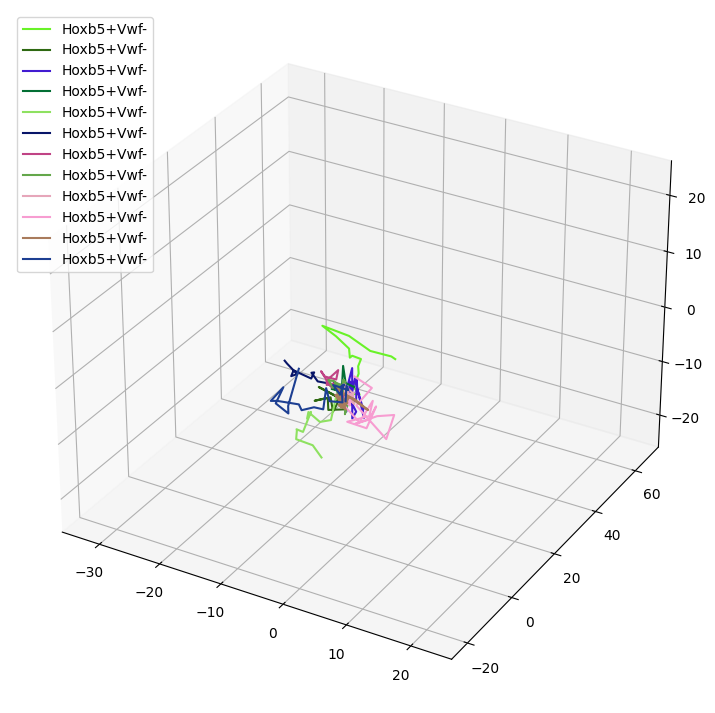

In [104]:
### homeostasis plot, separating Hoxb5+Vwf-

data=data[data['Treatment']=='homeostasis']
#removing TRACKS THAT ARE TOO SHORT
#print(my_list_hoxb5vwf)
remove_list =[]
grouped=data.groupby(['Track_ID'])
print(grouped)
for i, newdf in grouped:
    if len(newdf.index) <=10:
        print(i,'PBM')
        remove_list.append(i) #137
    else:
        print(i, 'no problem')


# print(len(remove_list))

# remove_list.append(['VWF_043_MS211126_m4-homeostasismovie_2_P7++_3.05e-05', 'VWF_049_MS220201_M1_Snap_movie5depletion_P10spot_1.53e-05'])


print(len(data))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

my_list_hoxb5 = np.unique(data['Track_ID'])
print(len(my_list_hoxb5))

#Plotting the tracks 

for a in my_list_hoxb5:
    data1= data[(data['Track_ID'] == a)].sort_values(by=['Metadata_Timepoint'])#Make sure not a string 
#    if len(data1['Metadata_Timepoint'])>2
    if a not in remove_list and a not in Hoxb5Vwf_list:
        X1= data1['corrected_x_2']
        Y1= data1['corrected_y_2']
        Z1= data1['corrected_z_2']
        r= random.random()
        b= random.random()
        g= random.random()
        ax.plot(X1, Y1, Z1, label='Hoxb5+Vwf-', c=(r,g,b))
        
    #    ax.set_xlim(-15, 20)
    #    ax.set_ylim(-20, 30)
    #    ax.set_zlim(-20, 10)    
        ax.set_xlim(-35, 25)
        ax.set_ylim(-25, 70)
        ax.set_zlim(-25, 25)
        ax.legend(loc='upper left')

        # Set figure width to 12 and height to 9
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0] = 12
        fig_size[1] = 9
        plt.rcParams["figure.figsize"] = fig_size
        print ("New size:", fig_size)


0
0


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_58829/4269228056.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


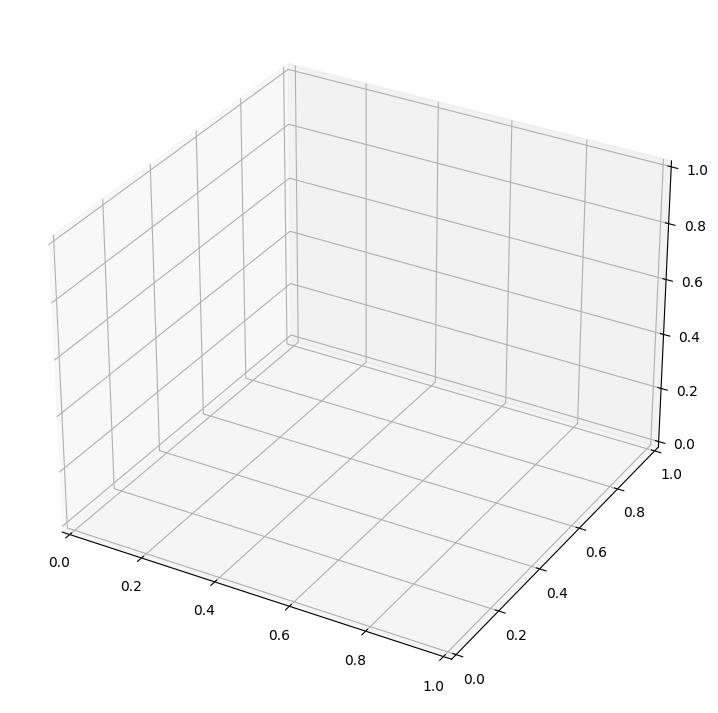

In [109]:
## after depletion plot, separating Hoxb5+Vwf-

data=data[data['Treatment']=='plt_depletion']
#removing TRACKS THAT ARE TOO SHORT
#print(my_list_hoxb5vwf)
remove_list =[]
grouped=data.groupby(['Track_ID'])
print(grouped)
for i, newdf in grouped:
    if len(newdf.index) <=10:
        print(i,'PBM')
        remove_list.append(i) #137
    else:
        print(i, 'no problem')


# print(len(remove_list))

# remove_list.append(['VWF_043_MS211126_m4-homeostasismovie_2_P7++_3.05e-05', 'VWF_049_MS220201_M1_Snap_movie5depletion_P10spot_1.53e-05'])


print(len(data))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

my_list_hoxb5 = np.unique(data['Track_ID'])
print(len(my_list_hoxb5))

#Plotting the tracks 

for a in my_list_hoxb5:
    data1= data[(data['Track_ID'] == a)].sort_values(by=['Metadata_Timepoint'])#Make sure not a string 
#    if len(data1['Metadata_Timepoint'])>2
    if a not in remove_list and a not in Hoxb5Vwf_list:
        X1= data1['corrected_x_2']
        Y1= data1['corrected_y_2']
        Z1= data1['corrected_z_2']
        r= random.random()
        b= random.random()
        g= random.random()
        ax.plot(X1, Y1, Z1, label='Hoxb5+Vwf-', c=(r,g,b))
        
    #    ax.set_xlim(-15, 20)
    #    ax.set_ylim(-20, 30)
    #    ax.set_zlim(-20, 10)    
        ax.set_xlim(-35, 25)
        ax.set_ylim(-25, 70)
        ax.set_zlim(-25, 25)
        ax.legend(loc='upper left')

        # Set figure width to 12 and height to 9
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0] = 12
        fig_size[1] = 9
        plt.rcParams["figure.figsize"] = fig_size
        print ("New size:", fig_size)


VWF_060_MS220408_M1_MOVIE1_P11DP_1.5259021893143654e-05 PBM
VWF_060_MS220408_M1_MOVIE1_P1DP_1.5259021893143654e-05 PBM
VWF_060_MS220408_M1_MOVIE1_P1DP_3.051804378628731e-05 PBM
VWF_060_MS220408_M1_MOVIE1_P8_1.5259021893143654e-05 PBM
VWF_060_MS220408_M1_MOVIE2_P4GREENVESSEL_1.5259021893143654e-05 PBM
VWF_060_MS220408_M1_MOVIE2_P4GREENVESSEL_3.051804378628731e-05 PBM
VWF_060_MS220408_M1_MOVIE3_P10_1.5259021893143654e-05 PBM
VWF_060_MS220408_M1_MOVIE3_P10_3.051804378628731e-05 PBM
VWF_060_MS220408_M1_MOVIE3_P10_4.577706567943096e-05 PBM
VWF_060_MS220408_M1_MOVIE3_P10_6.103608757257462e-05 PBM
VWF_060_MS220408_M1_MOVIE3_P11DP_1.5259021893143654e-05 PBM
VWF_060_MS220408_M1_MOVIE3_P1DP_1.5259021893143654e-05 PBM
VWF_060_MS220408_M1_MOVIE3_P1DP_3.051804378628731e-05 PBM
VWF_060_MS220408_M1_MOVIE3_P4GREENVESSEL_1.5259021893143654e-05 PBM
VWF_060_MS220408_M1_MOVIE3_P8_1.5259021893143654e-05 PBM
VWF_060_MS220408_M1_MOVIE4_P16_1.5259021893143654e-05 PBM
VWF_060_MS220408_M1_MOVIE4_P16_3.051804378

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_58829/2775800421.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


New size: [12, 9]
New size: [12, 9]


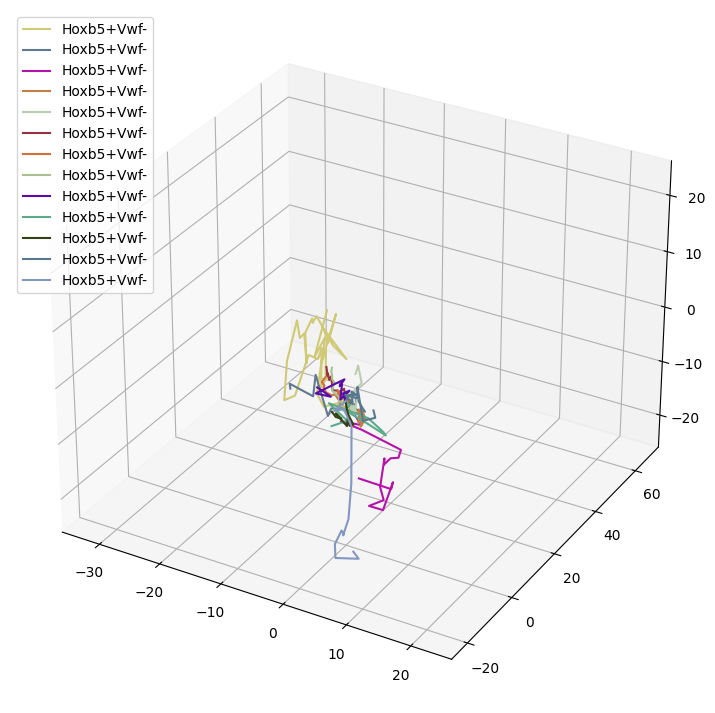

In [150]:
## 24H after depletion plot, separating Hoxb5+Vwf-

data=data[data['Treatment']=='24h_depletion']
#removing TRACKS THAT ARE TOO SHORT
#print(my_list_hoxb5vwf)
remove_list =[]
grouped=data.groupby(['Track_ID'])
print(grouped)
for i, newdf in grouped:
    if len(newdf.index) <=10:
        print(i,'PBM')
        remove_list.append(i) #137
    else:
        print(i, 'no problem')


# print(len(remove_list))

# remove_list.append(['VWF_043_MS211126_m4-homeostasismovie_2_P7++_3.05e-05', 'VWF_049_MS220201_M1_Snap_movie5depletion_P10spot_1.53e-05'])


print(len(data))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

my_list_hoxb5 = np.unique(data['Track_ID'])
print(len(my_list_hoxb5))

#Plotting the tracks 

for a in my_list_hoxb5:
    data1= data[(data['Track_ID'] == a)].sort_values(by=['Metadata_Timepoint'])#Make sure not a string 
#    if len(data1['Metadata_Timepoint'])>2
    if a not in remove_list and a not in Hoxb5Vwf_list:
        X1= data1['corrected_x_2']
        Y1= data1['corrected_y_2']
        Z1= data1['corrected_z_2']
        r= random.random()
        b= random.random()
        g= random.random()
        ax.plot(X1, Y1, Z1, label='Hoxb5+Vwf-', c=(r,g,b))
        
    #    ax.set_xlim(-15, 20)
    #    ax.set_ylim(-20, 30)
    #    ax.set_zlim(-20, 10)    
        ax.set_xlim(-35, 25)
        ax.set_ylim(-25, 70)
        ax.set_zlim(-25, 25)
        ax.legend(loc='upper left')

        # Set figure width to 12 and height to 9
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0] = 12
        fig_size[1] = 9
        plt.rcParams["figure.figsize"] = fig_size
        print ("New size:", fig_size)


VWF_043_MS211126_m4-homeostasismovie_2_P12+_1.5259021893143654e-05 PBM
VWF_043_MS211126_m4-homeostasismovie_2_P12+_3.051804378628731e-05 PBM
VWF_043_MS211126_m4-homeostasismovie_2_P1<3_1.5259021893143654e-05 no problem
VWF_043_MS211126_m4-homeostasismovie_2_P7++_1.5259021893143654e-05 PBM
VWF_043_MS211126_m4-homeostasismovie_2_P7++_3.051804378628731e-05 no problem
VWF_043_MS211126_m4-homeostasismovie_2_P7++_4.577706567943096e-05 PBM
VWF_043_MS211126_m4-homeostasismovie_2_P7++_6.103608757257462e-05 PBM
VWF_043_MS211126_m4-homeostasismovie_2_P7++_7.629510946571827e-05 PBM
VWF_048_MS220118_M3_movie2homeostasis_P12+_0.000106813153252 PBM
VWF_048_MS220118_M3_movie2homeostasis_P12+_1.5259021893143654e-05 PBM
VWF_048_MS220118_M3_movie2homeostasis_P12+_3.051804378628731e-05 PBM
VWF_048_MS220118_M3_movie2homeostasis_P12+_4.577706567943096e-05 PBM
VWF_048_MS220118_M3_movie2homeostasis_P12+_6.103608757257462e-05 PBM
VWF_048_MS220118_M3_movie2homeostasis_P12+_7.629510946571827e-05 PBM
VWF_048_MS22

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3364/4293078266.py:10: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


New size: [12, 9]


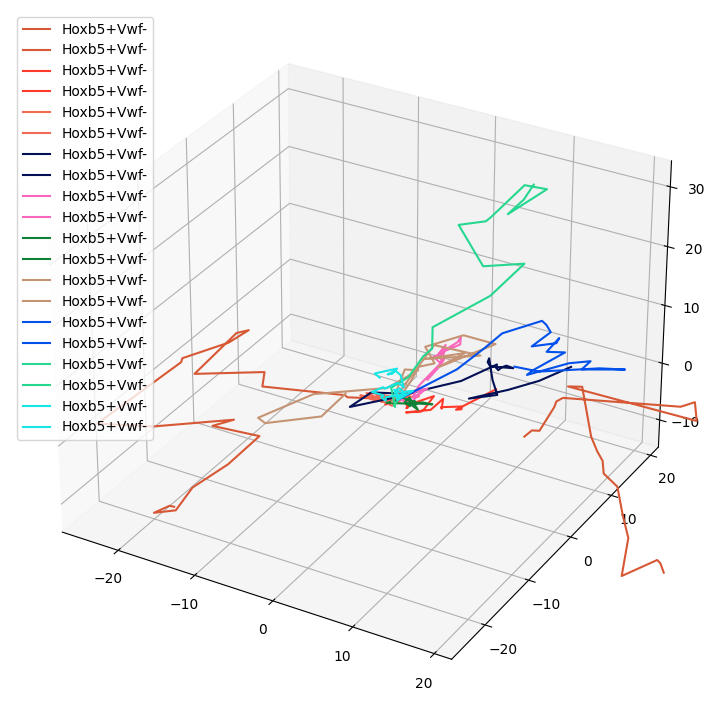

In [220]:
##COLOR BY 
#
from matplotlib import cm

# removing TRACKS THAT ARE TOO SHORT
#print(my_list_hoxb5vwf)
remove_list =[]
grouped=data.groupby(['Track_ID'])
print(grouped)
for i, newdf in grouped:
    if len(newdf.index) <=19:
        print(i,'PBM')
        remove_list.append(i) #137
    else:
        print(i, 'no problem')


print(len(remove_list))

# remove_list.append(['VWF_043_MS211126_m4-homeostasismovie_2_P7++_3.05e-05', 'VWF_049_MS220201_M1_Snap_movie5depletion_P10spot_1.53e-05'])


print(len(data))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

my_list_hoxb5 = np.unique(data['Track_ID'])
print(len(my_list_hoxb5))

#Plotting the tracks 

for a in my_list_hoxb5:
    data1= data[(data['Track_ID'] == a)].sort_values(by=['Metadata_Timepoint'])#Make sure not a string 
#    if len(data1['Metadata_Timepoint'])>2
    if a not in remove_list and a not in Hoxb5Vwf_list:
        X1= data1['corrected_x_2']
        Y1= data1['corrected_y_2']
        Z1= data1['corrected_z_2']
        depX=np.ma.masked_where(data1['corrected_x_2']>2, data1['corrected_x_2'])
        homX=np.ma.masked_where(data1['corrected_x_2']<2, data1['corrected_x_2'])
        XX=np.ma.masked_where(data1['corrected_x_2']==2, data1['corrected_x_2'])
        r= random.random()
        b= random.random()
        g= random.random()
        ax.plot(homX, depX, Y1, Z1, label='Hoxb5+Vwf-', c=(r,b,g))
        
    #    ax.set_xlim(-15, 20)
    #    ax.set_ylim(-20, 30)
    #    ax.set_zlim(-20, 10)    
        # ax.set_xlim(-65, 85)
        # ax.set_ylim(-125, 25)
        # ax.set_zlim(-4, 4)
        ax.legend(loc='upper left')

        # Set figure width to 12 and height to 9
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0] = 12
        fig_size[1] = 9
        plt.rcParams["figure.figsize"] = fig_size
        print ("New size:", fig_size)


VWF_043_MS211118_m1-p5_11_12_homeostasismovie_vasculature_P11_1.5259021893143654e-05 PBM
VWF_043_MS211118_m1-p5_11_12_homeostasismovie_vasculature_P11_3.051804378628731e-05 PBM
VWF_043_MS211118_m1-p5_11_12_homeostasismovie_vasculature_P11_4.577706567943096e-05 PBM
VWF_043_MS211118_m1-p5_11_12_homeostasismovie_vasculature_P11_6.103608757257462e-05 PBM
VWF_043_MS211118_m1-p5_11_12_homeostasismovie_vasculature_P11_7.629510946571827e-05 PBM
VWF_043_MS211118_m1-p5_11_12_homeostasismovie_vasculature_P12_0.000106813153252 PBM
VWF_043_MS211118_m1-p5_11_12_homeostasismovie_vasculature_P12_0.0001220721751451 PBM
VWF_043_MS211118_m1-p5_11_12_homeostasismovie_vasculature_P12_0.0001373311970382 PBM
VWF_043_MS211118_m1-p5_11_12_homeostasismovie_vasculature_P12_0.0001525902189314 PBM
VWF_043_MS211118_m1-p5_11_12_homeostasismovie_vasculature_P12_0.0001678492408245 PBM
VWF_043_MS211118_m1-p5_11_12_homeostasismovie_vasculature_P12_0.0001831082627177 PBM
VWF_043_MS211118_m1-p5_11_12_homeostasismovie_vasc

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_58829/1727903377.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


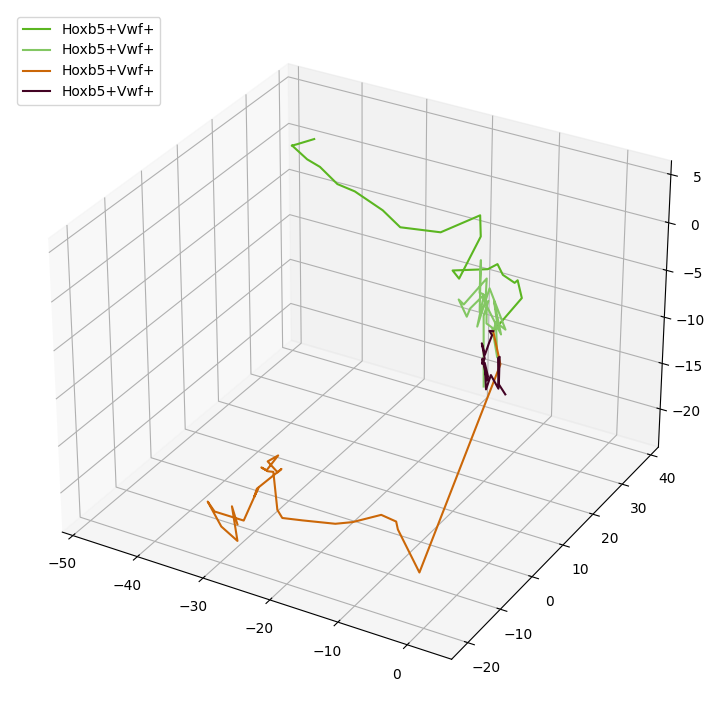

New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]


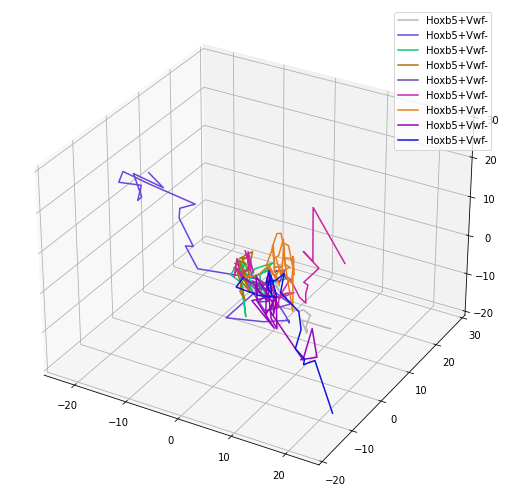

In [6]:
###post depletion plot Hoxb5+Vwf-

fig = plt.figure()
ax = fig.gca(projection='3d')

my_list_dep_hoxb5 = [14.2, 11.2, 9.3, 12.1,14.3, 17.1, 17.3, 17.4, 17.5]

for a in my_list_dep_hoxb5:
    data1= data[(data['cell_ID'] == a)]
    X1= data1['relative_x']
    Y1= data1['relative_y']
    Z1= data1['relative_z']
    r= random.random()
    b= random.random()
    g= random.random()
    ax.plot(X1, Y1, Z1, label='Hoxb5+Vwf-', c=(r,g,b))
    ax.set_xlim(-25, 25)
    ax.set_ylim(-20, 30)
    ax.set_zlim(-20, 30)   
    ax.legend()    
    
    ax.legend()

    # Set figure width to 12 and height to 9
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 9
    plt.rcParams["figure.figsize"] = fig_size
    print ("New size:", fig_size)

 


New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]


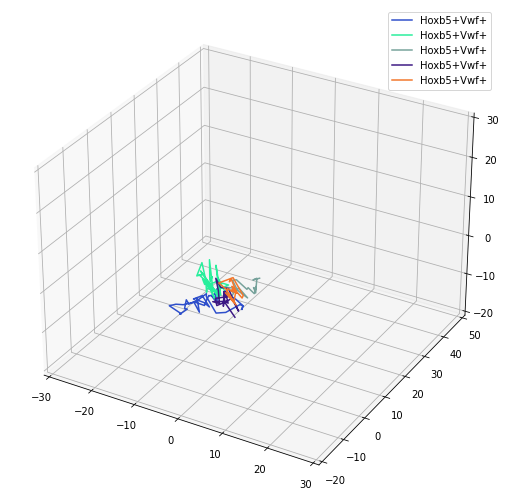

In [5]:
###24h post depletion plot Hoxb5+ Vwf+ 

fig = plt.figure()
ax = fig.gca(projection='3d')
#2.1, 6.1, 1.22, 14.1
my_list_dep_hoxb5vwf = [13.1, 13.2, 18.1, 18.2, 18.3]

for a in my_list_dep_hoxb5vwf:
    data1= data[(data['cell_ID'] == a)]
    X1= data1['relative_x']
    Y1= data1['relative_y']
    Z1= data1['relative_z']
    r= random.random()
    b= random.random()
    g= random.random()
    ax.plot(X1, Y1, Z1, label='Hoxb5+Vwf+', c=(r,g,b))
    
    ax.set_xlim(-30, 30)
    ax.set_ylim(-20, 50)
    ax.set_zlim(-20, 30)    
    ax.legend()

    # Set figure width to 12 and height to 9
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 9
    plt.rcParams["figure.figsize"] = fig_size
    print ("New size:", fig_size)



New size: [12, 9]
New size: [12, 9]
New size: [12, 9]


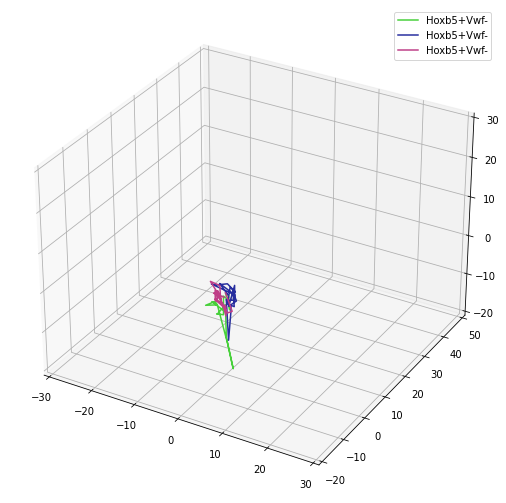

In [14]:
###24h post depletion plot Hoxb5+Vwf-

fig = plt.figure()
ax = fig.gca(projection='3d')

my_list_dep_hoxb5 = [16.1, 18.4, 19.1]

for a in my_list_dep_hoxb5:
    data1= data[(data['cell_ID'] == a)]
    X1= data1['relative_x']
    Y1= data1['relative_y']
    Z1= data1['relative_z']
    r= random.random()
    b= random.random()
    g= random.random()
    ax.plot(X1, Y1, Z1, label='Hoxb5+Vwf-', c=(r,g,b))
    ax.set_xlim(-30, 30)
    ax.set_ylim(-20, 50)
    ax.set_zlim(-20, 30)   
    ax.legend()    
    
    ax.legend()

    # Set figure width to 12 and height to 9
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 9
    plt.rcParams["figure.figsize"] = fig_size
    print ("New size:", fig_size)



New size: [12, 9]


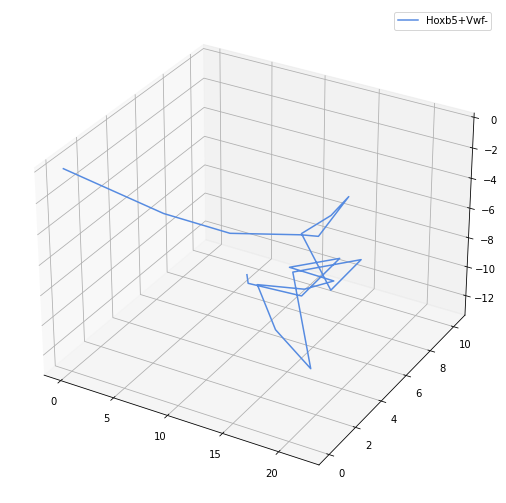

In [17]:

track_length=0
print(track_length)

my_list_dep_hoxb5vwf = [2.1, 6.1]
range_of_i = range(2,23)

for a in my_list_dep_hoxb5vwf:
    data1= data[(data['cell_ID'] == a)]
    i= data1.frame
    for i in range_of_i:
        data1.tracklength=track_length
        track_length=track_length+mt.sqrt(((data1.x[i]-data1.x[i-1])**2)+((data1.y[i]-data1.y[i-1])**2)+((data1.z[i]-data1.z[i-1])**2))
        #track_length_df=pd.DataFrame(track_length)
        #print(track_length)


print(data.tracklength)   
#data.tracklength.to_csv('track.tsv','\t')



In [43]:
#i=data.frame
#print(i)

#print(data['cell_ID'] == 11.2)

data = pd.read_csv('/Volumes/LUIS1_MS/Experiments/IVM_tracks.csv', header = 0)
print(data)

            x  relative_x        y  relative_y         z  relative_z  frame  \
0    1068.220       0.000  327.353       0.000  27.77760      0.0000      1   
1    1067.730      -0.490  327.636       0.283  27.78840      0.0108      2   
2    1069.680       1.460  328.081       0.728  28.46300      0.6854      3   
3    1069.680       1.460  329.026       1.673  28.41970      0.6421      4   
4    1067.730      -0.490  329.433       2.080  27.18380     -0.5938      5   
..        ...         ...      ...         ...       ...         ...    ...   
417   881.113     -41.987  147.775      29.832  11.22700      0.0000     18   
418   875.323     -47.777  152.921      34.978   8.55963      0.0000     19   
419   874.770     -48.330  155.125      37.182   6.79874      0.0000     20   
420   876.980     -46.120  154.776      36.833   5.98209      0.0000     21   
421   876.980     -46.120  158.930      40.987   7.76605      0.0000     22   

                                                  f

In [ ]:
### Single Hoxb5+  track for Tiago

fig = plt.figure()
ax = fig.gca(projection='3d')

my_list_hoxb5 = [3.4]

for a in my_list_hoxb5:
    data1= data[(data['cell_ID'] == a)]
    X1= data1['relative_x']
    Y1= data1['relative_y']
    Z1= data1['relative_z']
    r= random.random()
    b= random.random()
    g= random.random()
    ax.plot(X1, Y1, Z1, label='Hoxb5+Vwf-', c=(r,g,b))
    ax.set_xlim(-20, 20)
    ax.set_ylim(-2, 13)
    ax.set_zlim(-12, 2)
    
    ax.legend()

    # Set figure width to 12 and height to 9
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 9
    plt.rcParams["figure.figsize"] = fig_size
    print ("New size:", fig_size)

New size: [12, 9]


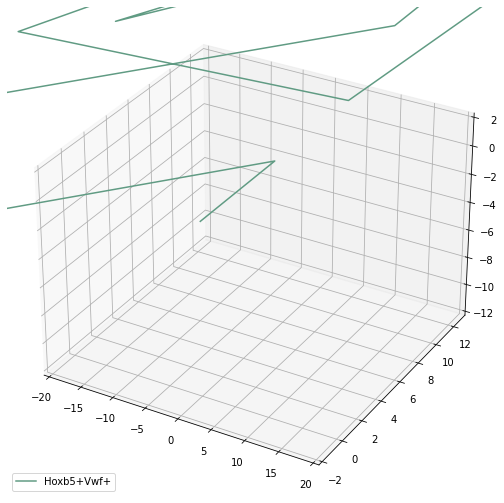

In [39]:
### single Hoxb5+Vwf+ track for Tiago #3.3

fig = plt.figure()
ax = fig.gca(projection='3d')


my_list_hoxb5vwf = [10.1]

for a in my_list_hoxb5vwf:
    data1= data[(data['cell_ID'] == a)]
    X1= data1['relative_x']
    Y1= data1['relative_y']
    Z1= data1['relative_z']
    r= random.random()
    b= random.random()
    g= random.random()
    ax.plot(X1, Y1, Z1, label='Hoxb5+Vwf+', c=(r,g,b))
    ax.set_xlim(-20, 20)
    ax.set_ylim(-2, 13)
    ax.set_zlim(-12, 2)
    
    ax.legend()

    # Set figure width to 12 and height to 9
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 9
    plt.rcParams["figure.figsize"] = fig_size
    print ("New size:", fig_size)


New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]


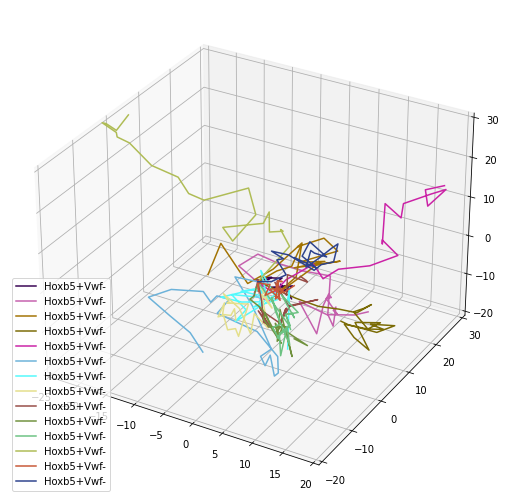

In [9]:
### homeostasis plot, separating Hoxb5+ and Hoxb5+Vwf+ CHANGING THE AXIS

fig = plt.figure()
ax = fig.gca(projection='3d')

my_list_hoxb5 = [1.1, 3.1, 3.2, 3.4, 3.5, 3.6, 7.1, 8.1, 8.2, 9.1, 9.2, 10.1, 1.4, 3.11]

for a in my_list_hoxb5:
    data1= data[(data['cell_ID'] == a)]
    X1= data1['relative_x']
    Y1= data1['relative_y']
    Z1= data1['relative_z']
    r= random.random()
    b= random.random()
    g= random.random()
    ax.plot(X1, Y1, Z1, label='Hoxb5+Vwf-', c=(r,g,b))
    
    ax.set_xlim(-25, 20)
    ax.set_ylim(-20, 30)
    ax.set_zlim(-20, 30)
    ax.legend()
    
    # Set figure width to 12 and height to 9
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 9
    plt.rcParams["figure.figsize"] = fig_size
    print ("New size:", fig_size)



New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]


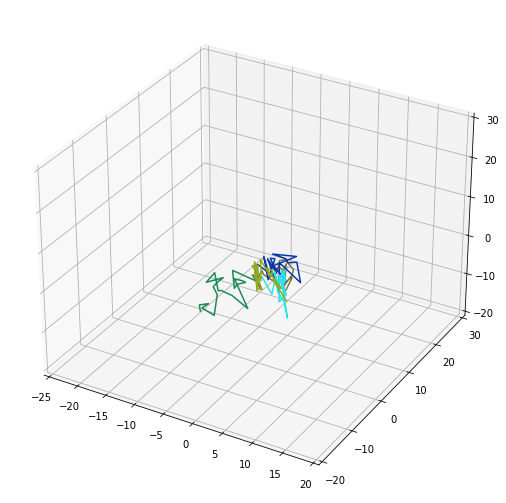

In [9]:
### homeostasis plot, separating Hoxb5+ and Hoxb5+Vwf+ FOR POSTER FIGURE NO LEGEND

fig = plt.figure()
ax = fig.gca(projection='3d')

my_list_hoxb5vwf = [1.2,1.3, 3.3, 4.1, 5.1]

for a in my_list_hoxb5vwf:
    data1= data[(data['cell_ID'] == a)]
    X1= data1['relative_x']
    Y1= data1['relative_y']
    Z1= data1['relative_z']
    r= random.random()
    b= random.random()
    g= random.random()
    ax.plot(X1, Y1, Z1, c=(r,g,b))
    
    ax.set_xlim(-25, 20)
    ax.set_ylim(-20, 30)
    ax.set_zlim(-20, 30)


    # Set figure width to 12 and height to 9
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 9
    plt.rcParams["figure.figsize"] = fig_size
    print ("New size:", fig_size)

